## HDipDAB_ThantThiha_2025Feb_IntegratedCA

Student Full Name: **Thant Thiha** <br>
Student Number: **2025178** <br>
Module Title: **Statistics, Machine Learning and Data Preparation - HDip DAB 2025 Feb** <br>
Assessment Title : **Integrated CA2** <br>
Assessment Due Date: 21 May 2025 <br>
Date of Submission: 16 May 2025

# Wheat Production Analysis and Supply Chain Optimization

### Background

This report is prepared for a multinational wheat production and supply chain company operating across major agricultural regions including Brazil, India, Australia, the United States, Canada and Syria. 

This report follows the problem-solving **PACE Framework** for structured analysis and includes actionable insights for improving wheat production efficiency, optimizing resource allocation and enhancing market pricing strategies and the notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

### PACE Framework Overview

The **PACE Framework** involves the following key stages:

1. **P - Plan**: Define the problem, identify data sources and set analysis goals.  
2. **A - Analyze**: Perform data cleaning, exploration and statistical analysis.  
3. **C - Construct**: Build models, create visualizations and prepare insights.  
4. **E - Execute**: Apply findings, deploy models and make data-driven decisions.

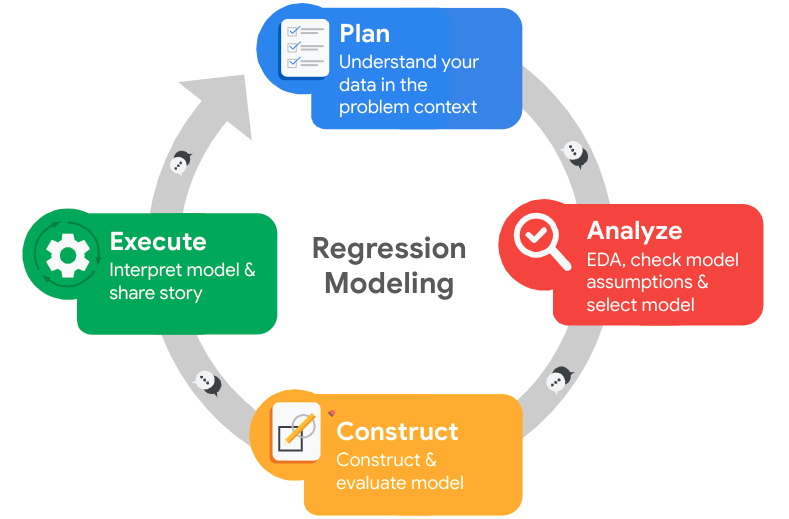

## 1. **P**ACE: Plan Stage

### 1.1 Business Scenario

The company aims to enhance its operations by leveraging data-driven insights from the provided dataset (`wheat_production_data.xlsx`) to achieve the following objectives:

1. **Predict Wheat Yield**: Accurately forecast crop yield (tons/ha) based on environmental conditions, soil characteristics and fertilizer usage.
2. **Identify Key Factors**: Understand the impact of weather, fertilizers, pest control and other variables on crop performance.
3. **Develop Pricing Strategies**: Optimize pricing based on market demand and production costs to maximize return-on-investment (ROI).
4. **Enhance Farmer Satisfaction**: Address farmer concerns and provide actionable recommendations to improve agricultural practices.

### 1.2 About the dataset 

The wheat production dataset comprises 900 observations across 9 attributes, covering various aspects of agricultural production, environmental conditions and economic factors. The dataset contains both categorical and numerical features with minimal missing values that require attention during preprocessing.

| Column Name               | Data Type  | Description                                                                                                                                      |
|---------------------------|------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| Region                    | Categorical| The region where the wheat is produced such as "North America", "Europe", "Asia", "Africa".                                           |
| Weather Conditions        | Categorical| The weather conditions during the wheat growing season such as "Drought", "Rainy", "Sunny", "Stormy", etc.                             |
| Soil Type                 | Categorical| The type of soil in which the wheat is grown such as "Sandy", "Clay", "Silt", "Loamy", etc.                                            |
| Fertilizer Usage (kg/ha) | Numeric     | The amount of fertilizer used per hectare of land in kilograms per hectare.                                                           |
| Crop Yield (tons/ha)     | Numeric     | The amount of wheat produced per hectare of land in tons per hectare.                                                                 |
| Pest Infestation Level   | Numeric     | The percentage of pest infestation in the wheat field (0-100%).                                                       |
| Market Price per Ton     | Numeric     | The price per ton of wheat in the market in USD per ton.                                                                             |
| Production Cost ($/ha)   | Numeric     | The total cost of production per hectare, including labor, equipment, irrigation, etc in USD per hectare.                             |
| Farmer Satisfaction Score| Categorical| The satisfaction level of the farmer regarding the wheat production. Values: 1 (Very Unsatisfied) to 5 (Very Satisfied).                         |


### 1.3 Imports
#### 1.3.1 Import libraries
Required Python libraries (`Pandas`, `Numpy`, `matplotlib`, `seaborn`) for data imports, analysis and visualization are imported into the notebook.

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 1.3.2 Data import and Load dataset
Dataset is imported into the notebook as `df` by using `Pandas`. We then see the top 5 rows of the dataset to get an overall sense of what the data look like.

In [9]:
# Import dataset
df = pd.read_excel("wheat_production_data.xlsx")

# View the top 5 rows
df.head().T

0              1            2  \
Region                           Europe  North America         Asia   
Weather Conditions               Cloudy         Cloudy        Rainy   
Soil Type                          Silt         Saline       Saline   
Fertilizer Usage (kg/ha)     231.288932      97.797675   134.565776   
Crop Yield (tons/ha)           5.254826       2.897609     4.284138   
Pest Infestation Level (%)    18.267238      13.959887    57.647244   
Market Price per Ton ($)     401.139462     393.143675   450.476991   
Production Cost ($/ha)      1525.682301    1629.678271  1591.178587   
Farmer Satisfaction Score             5              2            1   

                                        3              4  
Region                      North America  North America  
Weather Conditions                  Sunny          Rainy  
Soil Type                           Loamy          Sandy  
Fertilizer Usage (kg/ha)       127.174686     286.758997  
Crop Yield (tons/ha)             4.486818       6.522978  
Pest Infestation Level (%)      76.188361      78.150565  
Market Price per Ton ($)        389.11384     192.736517  
Production Cost ($/ha)        1804.424687      784.16515  
Farmer Satisfaction Score               3              5

### 1.4 Data Exploration (Initial EDA and data cleaning/validation)
In the following steps, we will perform intital EDA to understand more about the variables and clean and validate the data.

#### 1.4.1 Gather descriptive stats about the data

In [11]:
# View the summary statistics
df.describe().T

count         mean         std         min  \
Fertilizer Usage (kg/ha)    898.0   177.316221   72.951801   50.047100   
Crop Yield (tons/ha)        897.0     5.071745    1.699855    2.012111   
Pest Infestation Level (%)  898.0    47.744286   29.074580    0.018653   
Market Price per Ton ($)    897.0   298.814258  113.704917  100.830607   
Production Cost ($/ha)      899.0  1240.919957  441.624968  500.941275   
Farmer Satisfaction Score   900.0     2.900000    1.434906    1.000000   

                                   25%          50%          75%          max  
Fertilizer Usage (kg/ha)    113.642189   181.511382   240.425548   299.928451  
Crop Yield (tons/ha)          3.668775     5.129596     6.522404     7.978390  
Pest Infestation Level (%)   22.619756    46.394047    73.022586    99.762282  
Market Price per Ton ($)    202.037373   300.416095   396.919503   499.619799  
Production Cost ($/ha)      841.753127  1246.274640  1600.994657  1999.773867  
Farmer Satisfaction Score     2.000000     3.000000     4.000000     5.000000

#### 1.4.2 Gather basic information of the data

In [13]:
# View the overview of data and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region                      900 non-null    object 
 1   Weather Conditions          900 non-null    object 
 2   Soil Type                   900 non-null    object 
 3   Fertilizer Usage (kg/ha)    898 non-null    float64
 4   Crop Yield (tons/ha)        897 non-null    float64
 5   Pest Infestation Level (%)  898 non-null    float64
 6   Market Price per Ton ($)    897 non-null    float64
 7   Production Cost ($/ha)      899 non-null    float64
 8   Farmer Satisfaction Score   900 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 63.4+ KB


#### 1.4.3 Check missing values

In [15]:
# Check missing values
df.isna().sum()

Region                        0
Weather Conditions            0
Soil Type                     0
Fertilizer Usage (kg/ha)      2
Crop Yield (tons/ha)          3
Pest Infestation Level (%)    2
Market Price per Ton ($)      3
Production Cost ($/ha)        1
Farmer Satisfaction Score     0
dtype: int64

#### 1.4.4 Check for duplicates

In [17]:
# Check for duplicates
df.duplicated().sum()

0

#### 1.4.5 Check the Shape of the dataset

In [19]:
# Check dataset shape
df.shape

(900, 9)

#### 1.4.6 Drop the missing values
Since missing values are only less than 1% of the total observations and it won't affect the overall distrbution of the data even if we remove, we will drop them for now. After that, it's verified that only 890 rows with no missing values.

In [21]:
# Drop missing values
df.dropna(inplace=True)

# Verify the drop
df.shape

(890, 9)

#### 1.4.7 Validate the data
Next, we will validate the variables, their respective values and data types.

In [23]:
# Specify the categorical columns
cat_cols = ["Region", "Weather Conditions", "Soil Type", "Farmer Satisfaction Score"]

# Compute and print unique values for each column
for col in cat_cols:
    uniques = df[col].unique()
    print(f"{col} ({len(uniques)}): {uniques}\n")

Region (6): ['Europe' 'North America' 'Asia' 'Australia' 'Africa' 'South America']

Weather Conditions (5): ['Cloudy' 'Rainy' 'Sunny' 'Drought' 'Stormy']

Soil Type (5): ['Silt' 'Saline' 'Loamy' 'Sandy' 'Peaty']

Farmer Satisfaction Score (5): [5 2 1 3 4]



#### 1.4.8 Check outliers
Then, we will check if there is an outlier in the numerical variables.

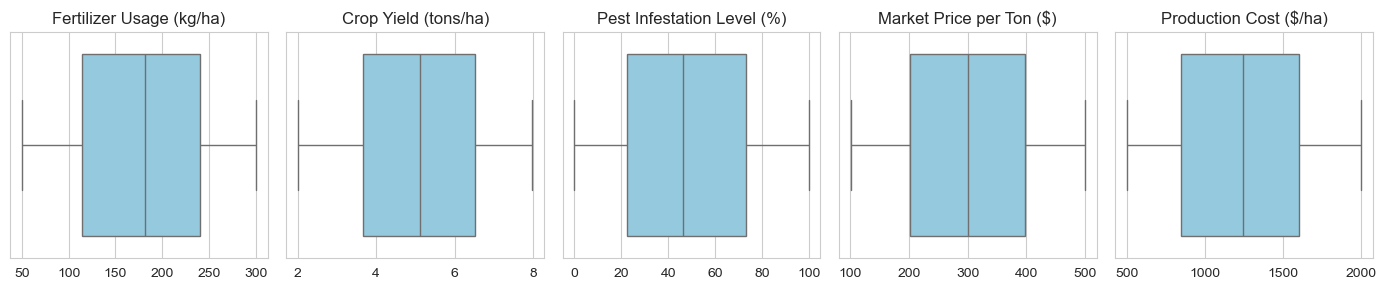

In [25]:
# Define the numeric columns
num_cols = [
    "Fertilizer Usage (kg/ha)",
    "Crop Yield (tons/ha)",
    "Pest Infestation Level (%)",
    "Market Price per Ton ($)",
    "Production Cost ($/ha)"
]

# Set up the plotting grid
plt.figure(figsize=(14, 3))
sns.set_style('whitegrid')

for i, col in enumerate(num_cols, start=1):
    plt.subplot(1, 5, i)
    sns.boxplot(x=df[col].dropna(), color="skyblue")
    plt.title(col)
    plt.xlabel("")  # Hide the x‐axis label for clarity

plt.tight_layout()
plt.show()

#### 1.4.9 Rename the columns 
Before moving forward, we will rename the columns to make it shorter and easier to use later.

In [27]:
# Define mapping from old names to new names
rename_map = {
    "Fertilizer Usage (kg/ha)": "Fertilizer",
    "Crop Yield (tons/ha)":      "Yield",
    "Pest Infestation Level (%)":"Pest",
    "Market Price per Ton ($)":  "Price",
    "Production Cost ($/ha)":    "Cost",
    "Farmer Satisfaction Score": "Satisfaction",
    "Region":                    "Region",
    "Weather Conditions":        "Weather",
    "Soil Type":                 "Soil"
}

# Apply the rename
df.rename(columns=rename_map, inplace=True)

# Verify
print(df.columns.tolist())

['Region', 'Weather', 'Soil', 'Fertilizer', 'Yield', 'Pest', 'Price', 'Cost', 'Satisfaction']


| Original Column Name             | Renamed Column |
|----------------------------------|----------------|
| Fertilizer Usage (kg/ha)         | Fertilizer     |
| Crop Yield (tons/ha)             | Yield          |
| Pest Infestation Level (%)       | Pest           |
| Market Price per Ton (\$)         | Price          |
| Production Cost ($/ha)           | Cost           |
| Farmer Satisfaction Score        | Satisfaction   |
| Region                           | Region         |
| Weather Conditions               | Weather        |
| Soil Type                        | Soil           |

### 1.5 Summary of Characterization of the dataset

After examining the dataset as above steps, we can see that the unique‐value checks and range scans confirm that all categorical and numerical fields fall within expected, domain‐appropriate bounds:

`Region`: 6 distinct values – Europe, North America, Asia, Australia, Africa, South America
All six major agricultural regions are represented, with no unexpected or misspelled entries.

`Weather Conditions`: 5 distinct values – Cloudy, Rainy, Sunny, Drought, Stormy
These align with the five defined weather categories used across the dataset.

`Soil Type`: 5 distinct values – Silt, Saline, Loamy, Sandy, Peaty
Each of the five soil classifications appears exactly as specified, with no anomalies.

`Farmer Satisfaction Score`: 5 distinct integer values – 1, 2, 3, 4, 5
The full 1–5 scale is present and there are no out-of-range scores.

`Fertilizer Usage` (kg/ha): ranges approx. from 50 to 300
Values are all positive and within realistic agronomic application rates.

`Crop Yield` (tons/ha): ranges approx. from 2 to 8
Yields are within expected commercial wheat productivity levels.

`Pest Infestation Level` (%): ranges 0–100%
No values exceed 100% or drop below 0%, confirming plausibility.

`Market Price` per Ton ($): ranges approx. from 100 to 500
Prices are all positive and in line with global market norms.

`Production Cost` ($/ha): ranges approx. from 500 to 2,000
Costs fall within reasonable operational expenses for wheat farming.

Overall, there are no unexpected categories, no out-of-range numeric values and outliers and all variables conform to the predefined schema.

## 2. P**A**CE: Analyze Stage

### 2.1 Feature Engineering
Before we go into Exploratory Data Analysis (EDA), we will create the following new features based on the existing variables.

Feature engineering transforms raw inputs into metrics that capture agronomic efficiency, economic performance and risk exposure-making models more interpretable and predictive while aligning with business objectives. This also enhances model interpretability, drives dimensionality reduction and supports targeted decision-making across production, marketing and extension services.

1. Fertilizer Efficiency (`Yield_per_Fertilizer`): Measures tons of wheat produced per ton of fertilizer applied. Higher values indicate more efficient nutrient use and better agronomic return on fertilizer inputs.
2. Cost Efficiency (`Cost_per_Ton`): Shows dollars spent per ton of wheat produced. Lower values reflect superior cost control and greater economic efficiency.
3. Profitability (`Profit_per_ha`): Calculates net dollars earned per hectare (revenue minus cost). Higher values denote more profitable fields or production contexts. A negative value signals a loss per hectare.
4. Return on Investment (`Return_on_investment`): Expresses profit as a fraction of cost (Profit_per_ha ÷ Cost). Higher ratios mean every dollar invested yields greater return, highlighting high-payoff practices or regions.
5. Pest Damage Estimate (`Pest Damage Estimate`): Estimates the tonnage lost to pests (Pest % × Yield). Lower estimates are preferable, indicating effective pest control and less yield loss.
6. Yield After Pest Impact (`Yield After Pest`): Net yield remaining after subtracting estimated pest damage. Higher values show better actual output available for market and fewer pest-related losses.
7. Cost-to-Price Ratio (`Cost-to-Price Ratio`): Compares production cost to total revenue (Cost ÷ (Yield × Price)). Lower ratios signal that costs are well under market value, preserving margin. Ratios above 1 warn that cost exceeds revenue.

In [32]:
# 1. Fertilizer Efficiency
df['Yield_per_Fertilizer'] = df['Yield']/(df['Fertilizer']/907.2) # convert from kg to ton

# 2. Cost Efficiency
df['Cost_per_Ton'] = df['Cost']/df['Yield']

# 3. Profitability
df['Profit_per_ha'] = (df['Yield'] * df['Price']) - df['Cost']

# 4. Return on Investmetn (ROI)
df['Return_on_investment'] = df['Profit_per_ha']/df['Cost']

# 5. Pest Damage Estimate
df['Pest Damage Estimate'] = (df['Pest'] * df['Yield']) / 100

# 6. Yield After Pest Impact
df['Yield After Pest'] = df['Yield'] - df['Pest Damage Estimate']

# 7. Cost-to-Price Ratio
df['Cost-to-Price Ratio'] = df['Cost'] / (df['Yield'] * df['Price'])

In [33]:
# Verify the new columns
df.head()

Region Weather    Soil  Fertilizer     Yield       Pest       Price  \
0         Europe  Cloudy    Silt  231.288932  5.254826  18.267238  401.139462   
1  North America  Cloudy  Saline   97.797675  2.897609  13.959887  393.143675   
2           Asia   Rainy  Saline  134.565776  4.284138  57.647244  450.476991   
3  North America   Sunny   Loamy  127.174686  4.486818  76.188361  389.113840   
4  North America   Rainy   Sandy  286.758997  6.522978  78.150565  192.736517   

          Cost  Satisfaction  Yield_per_Fertilizer  Cost_per_Ton  \
0  1525.682301             5             20.611354    290.339261   
1  1629.678271             2             26.879070    562.421790   
2  1591.178587             1             28.882307    371.411601   
3  1804.424687             3             32.006696    402.161302   
4   784.165150             5             20.636304    120.215816   

   Profit_per_ha  Return_on_investment  Pest Damage Estimate  \
0     582.235783              0.381623              0.959912   
1    -490.501739             -0.300981              0.404503   
2     338.727049              0.212878              2.469688   
3     -58.541590             -0.032443              3.418433   
4     473.050948              0.603254              5.097744   

   Yield After Pest  Cost-to-Price Ratio  
0          4.294914             0.723786  
1          2.493106             1.430576  
2          1.814451             0.824485  
3          1.068385             1.033531  
4          1.425234             0.623731

### 2.2 Exploratory Data Analysis (EDA) and Statistical Analysis
In this stage, we will perform EDA and statistical analysis to analyze the relationship between variables and provides insights into factors affecting wheat production.
#### 2.2.1 Regions Vs Key Metrics

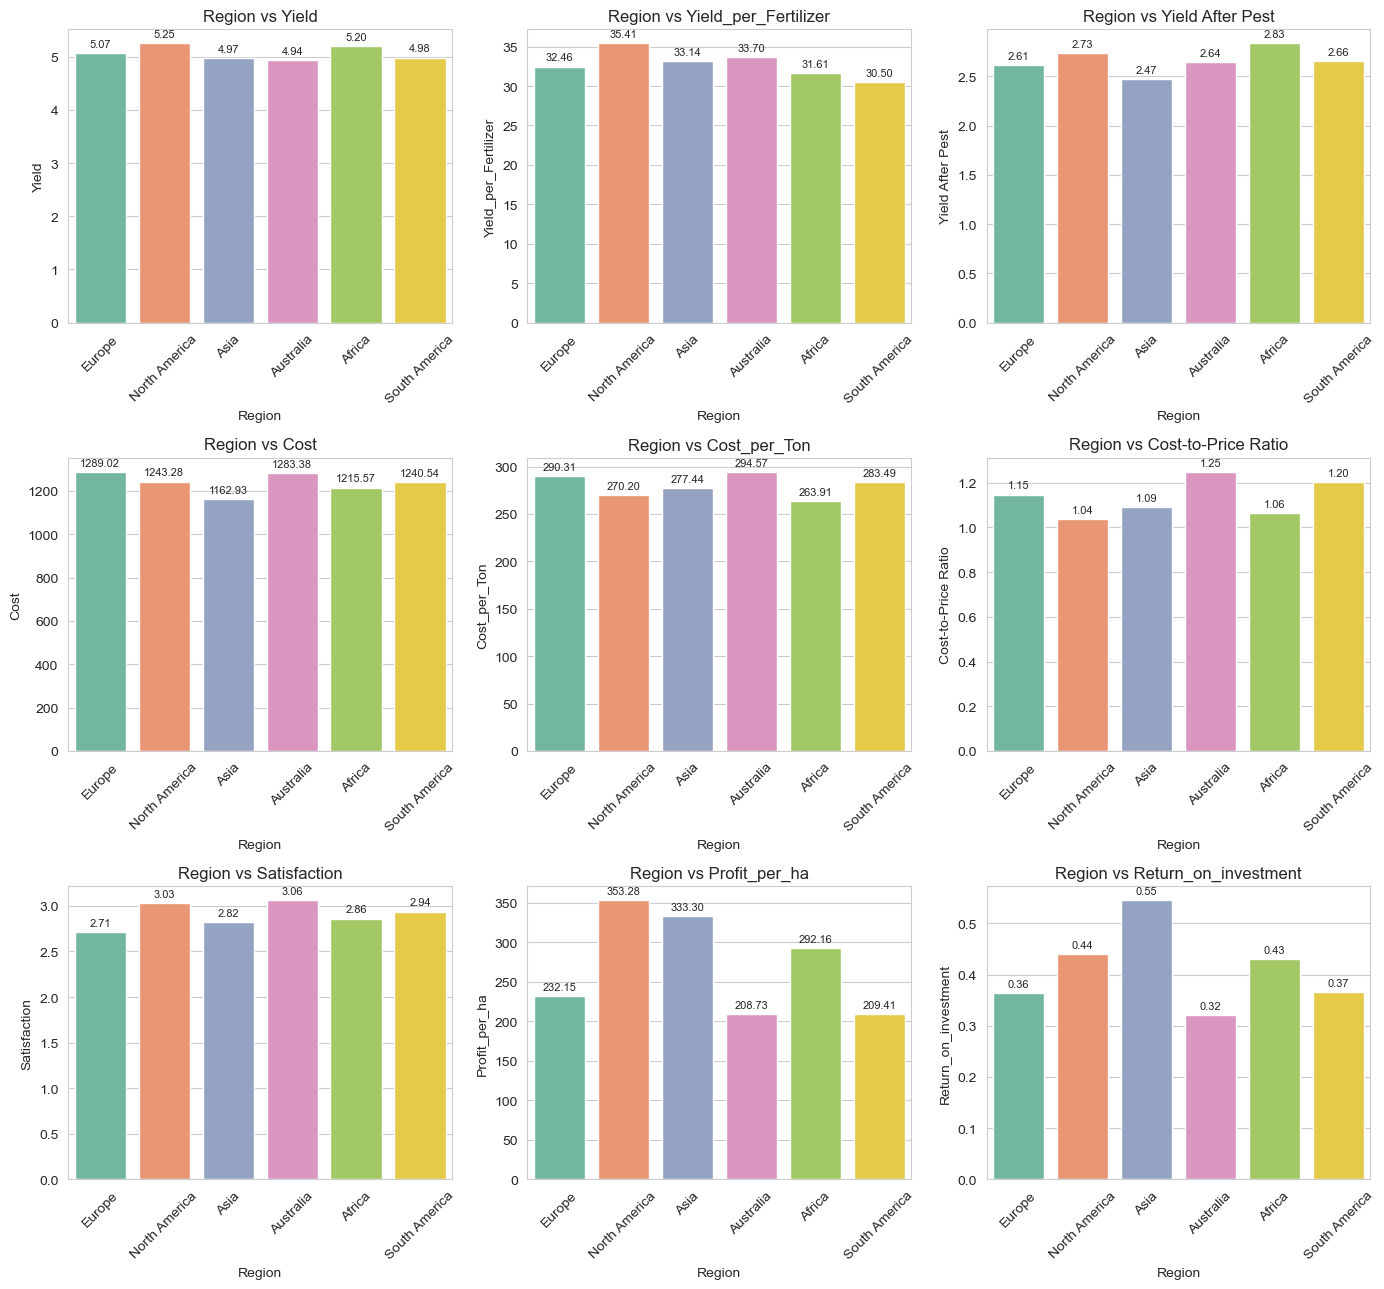

In [35]:
# Key metrics
metrics = ['Yield', 'Yield_per_Fertilizer', 'Yield After Pest', 
           'Cost', 'Cost_per_Ton', 'Cost-to-Price Ratio',
           'Satisfaction',  'Profit_per_ha', 'Return_on_investment']

# Plot barplots by Region with annotation
fig, axes = plt.subplots(3, 3, figsize=(14, 13))
axes = axes.flatten()

for ax, col in zip(axes, metrics):
    sns.barplot(x='Region',
                y=col,
                data=df,
                palette="Set2",
                ci=None,
                ax=ax)
    ax.set_title(f'Region vs {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # Annotate each bar with its height
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)


plt.tight_layout()
plt.savefig('region.jpg')
plt.show()

Region-Level Insights

- North America leads in agronomic efficiency with the highest average yield (5.25 ton/ha) and fertilizer efficiency (35.4 ton of yield per fertilizer) driving the top profit per hectare ($353) and a strong farmer satisfaction score (3.03/5).

- Africa combines a high net yield after pest losses (2.83 ton/ha) with the lowest cost per ton of production ($263) resulting in a robust return on investment (0.43) and solid profitability.

- Asia, despite moderate yields (4.97 ton/ha), achieves the highest ROI (0.55) and substantial profit per hectare ($333) reflecting highly cost-effective operations.

- Australia posts the highest farmer satisfaction (3.06/5) but suffers from elevated production costs ($1,283/ha) and the lowest ROI (0.32), limiting overall economic returns.

- Europe’s moderate yields (5.07 t/ha) are offset by the highest costs ($1,289/ha) and cost-to-price ratio (1.15), leading to the lowest satisfaction (2.71/5) and weaker profitability (ROI 0.36).

#### 2.2.2 Soil vs Key Metrics

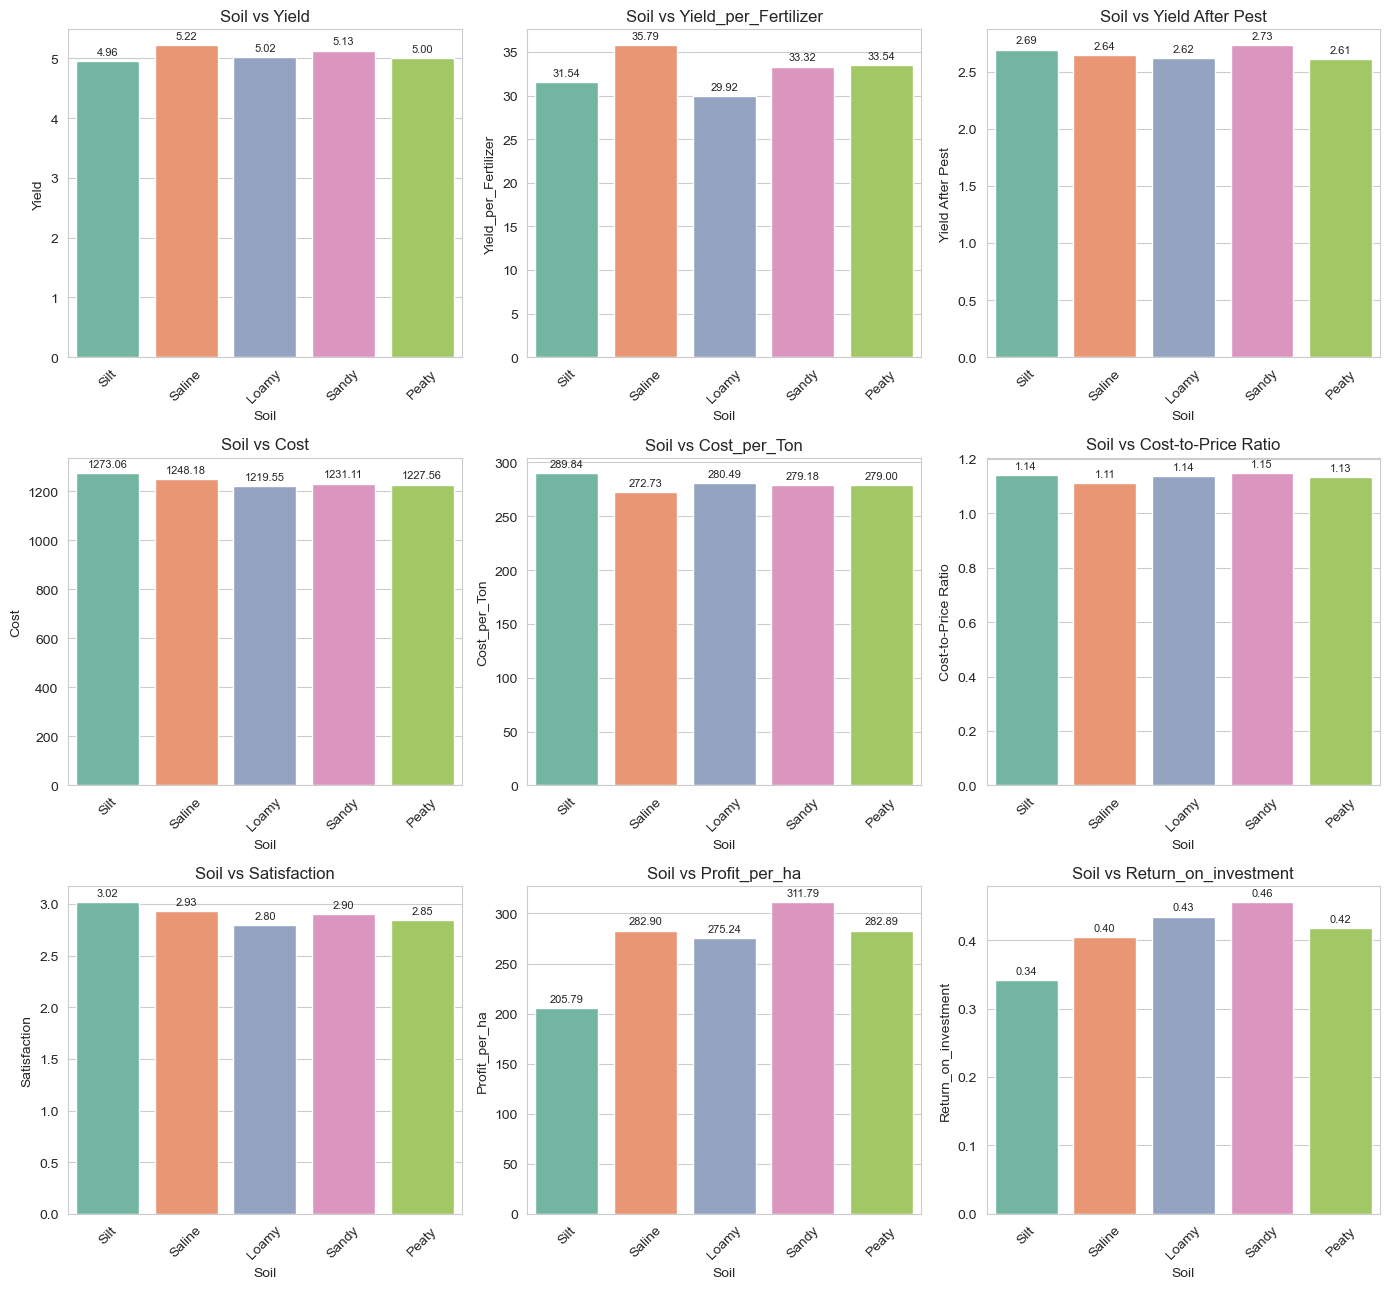

In [38]:
# Soil vs Key Metrics
fig, axes = plt.subplots(3, 3, figsize=(14, 13))
axes = axes.flatten()

for ax, col in zip(axes, metrics):
    sns.barplot(x='Soil',
                y=col,
                data=df,
                palette="Set2",
                ci=None,
                ax=ax)
    ax.set_title(f'Soil vs {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{h:.2f}",
                    xy=(p.get_x() + p.get_width() / 2, h),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

plt.tight_layout()
plt.savefig('soil.jpg')
plt.show()

Soil-Type Comparisons

Silt soils yield slightly below average (4.96 ton/ha) and convert fertilizer into yield not efficiently (31.5 ton per ton of fertilizer), while incurring the highest cost per ton (\$289.8/ton). They deliver the lowest profit (\\$205.8/ha) and ROI (0.34) yet paradoxically report the highest farmer satisfaction (3.02/5).

Saline soils top the yield chart (5.22 ton/ha) and highest fertilizer efficiency (35.8 ton), enjoy the lowest cost per ton (\\$272.7/t) and generate solid profitability ($282.9/ha) with a moderate ROI (0.40) and satisfaction (2.93/5).

Loamy soils offer average yields (5.02 ton/ha) but suffer the poorest fertilizer efficiency (29.9 ton). Their mid-range cost per ton (\\$280.5/t) translates into moderate profit ($275.2/ha), a respectable ROI (0.43) and the lowest satisfaction score (2.80/5).

Sandy soils combine high yields (5.13 ton/ha) with above-average fertilizer efficiency (33.3 ton), producing the strongest profit (\\$311.8/ha) and highest ROI (0.46) alongside solid farmer satisfaction (2.90/5).

Peaty soils deliver moderate yields (5.00 t/ha) and fertilizer efficiency (33.5 t/t), incur average costs per ton (\\$279.0/t) and cost-to-price ratios (1.13) and achieve healthy profit ($282.9/ha), ROI (0.42) and an average satisfaction (2.85/5).

#### 2.2.3 Weather vs Key Metrics

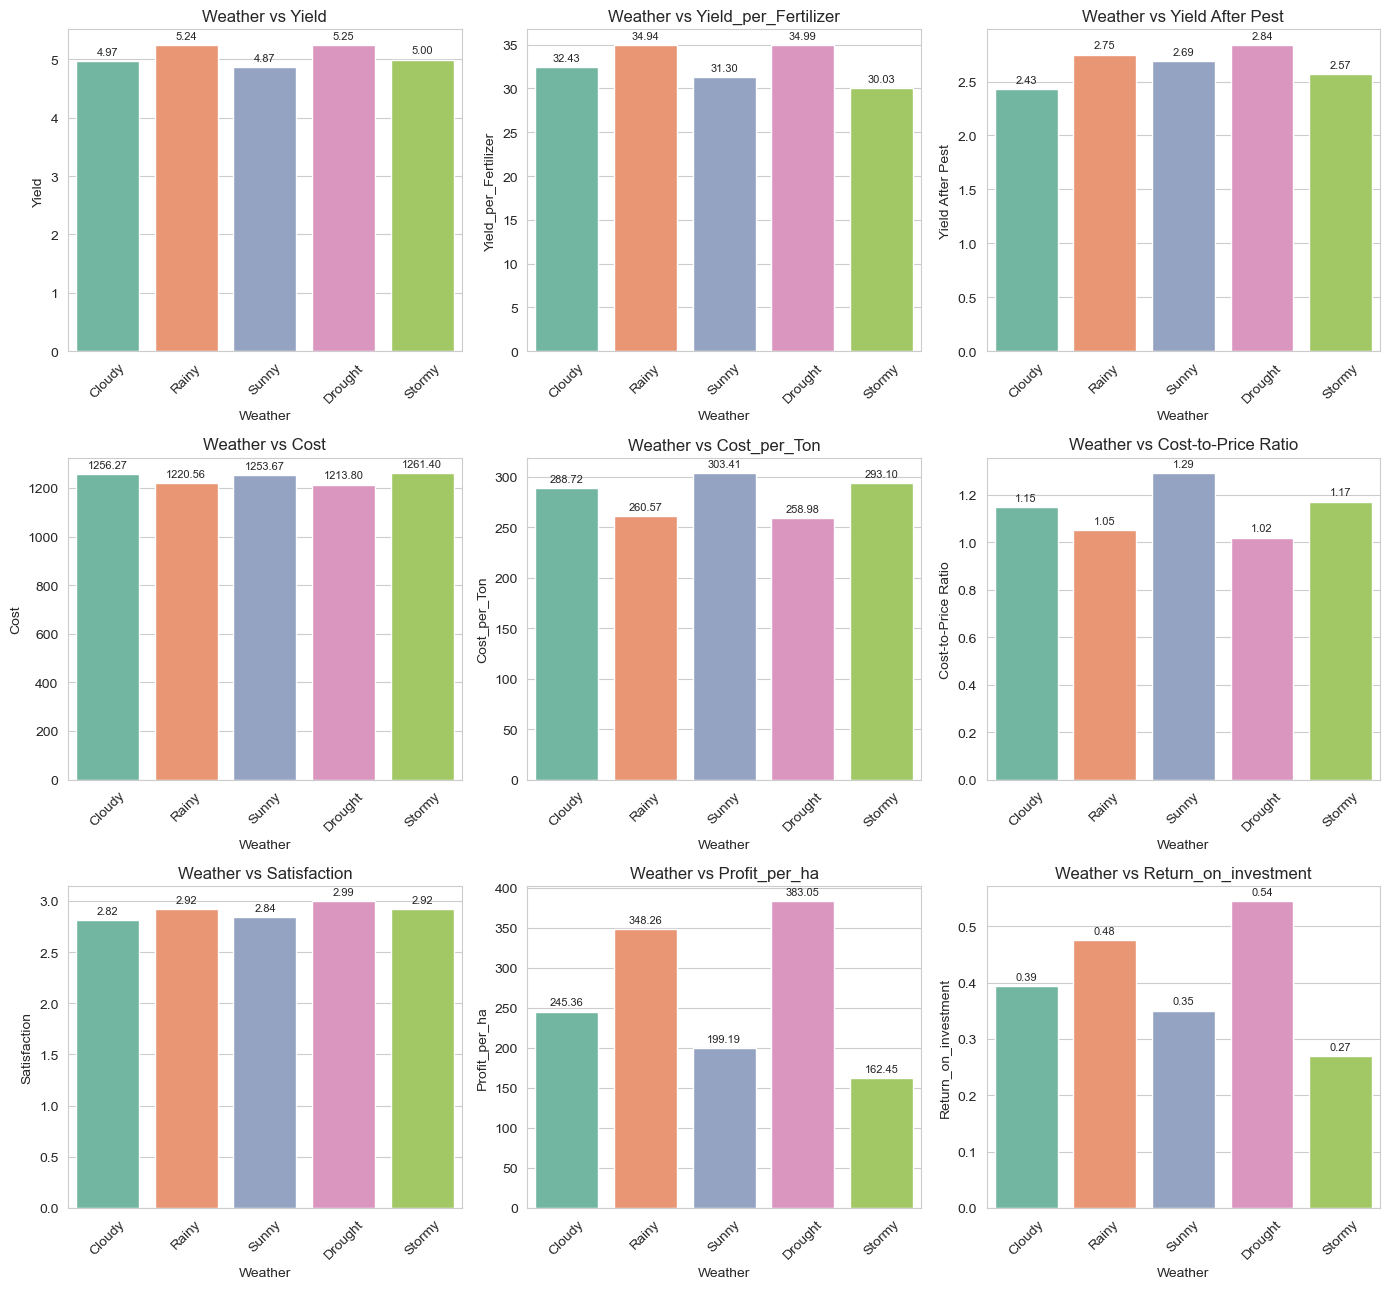

In [41]:
# Weather vs Key Metrics
fig, axes = plt.subplots(3, 3, figsize=(14, 13))
axes = axes.flatten()

for ax, col in zip(axes, metrics):
    sns.barplot(x='Weather',
                y=col,
                data=df,
                palette="Set2",
                ci=None,
                ax=ax)
    ax.set_title(f'Weather vs {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{h:.2f}",
                    xy=(p.get_x() + p.get_width() / 2, h),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

plt.tight_layout()
plt.savefig('weather.jpg')
plt.show()

Weather-Condition Effects

- Drought and Rainy conditions drive the strongest overall performance, with yields above 5.2 ton/ha, fertilizer efficiency near 35 ton, profits exceeding $348/ha, and ROIs of 0.48–0.54.

- Sunny and Stormy spells deliver the weakest outcomes-yields under 5 ton/ha, fertilizer efficiency below 31 ton, profits under $200/ha (Stormy), and ROIs below 0.35.

- Pest-adjusted (net) yields peak in Drought (2.84 ton/ha) and Rainy (2.75 ton/ha) scenarios, while Cloudy conditions suffer the greatest loss (2.43 ton/ha).

- Cost per ton is lowest under Drought (\\$259/ton) and Rainy (\\$261/ton), versus Sunny and Stormy where it tops $293/ton, reflecting higher cost-to-price ratios (>1.15) in adverse weather.

## Statistical Techniques for Data Analytics
### 2.2.3 Descriptive Analysis
This section summarizes the key characteristics of the wheat production dataset including central tendency, variability, probability distributions and normality. The analysis integrates agricultural context with statistical theory to guide decision-making for production optimization. The `df` dataset now contains 890 observations with 18 columns: three categorical (`Region`, `Weather`, `Soil`) and 15 numerical including derived metrics such as `Return_on_investment`, `Cost_per_Ton`.

In [44]:
# Select numerical and categorical columns
num_cols = ['Fertilizer', 'Yield', 'Pest', 'Price', 
            'Cost', 'Satisfaction', 'Yield_per_Fertilizer', 
            'Cost_per_Ton', 'Profit_per_ha', 'Return_on_investment', 
            'Yield After Pest', 'Cost-to-Price Ratio']
cat_cols = ['Region', 'Weather', 'Soil']

from scipy import stats

### 2.2.3a Central Tendency Metrics
For each numeric column, we compute key summary statistics: count, mean, median, mode, minimum, maximum, standard deviation and variance.

In [46]:
# Central Tendency Metrics
central_tendency = df[num_cols].agg(['mean', 'median']).T
central_tendency['mode'] = [df[col].mode()[0] for col in num_cols]

print("Central Tendency Metrics")
print(central_tendency.round(2))

Central Tendency Metrics
                         mean   median     mode
Fertilizer             177.50   181.69    50.05
Yield                    5.07     5.13     4.24
Pest                    47.63    46.32    55.28
Price                  298.89   300.12   100.83
Cost                  1240.55  1246.06   510.56
Satisfaction             2.90     3.00     1.00
Yield_per_Fertilizer    32.79    26.78     6.13
Cost_per_Ton           280.23   242.83    67.02
Profit_per_ha          270.45   145.43 -1685.51
Return_on_investment     0.41     0.14    -0.87
Yield After Pest         2.66     2.39     0.01
Cost-to-Price Ratio      1.13     0.88     0.16


### 2.2.3b Variation Metrics

In [48]:
variation = df[num_cols].agg(['std', 'var', 'min', 'max']).T
variation['IQR'] = [df[col].quantile(0.75) - df[col].quantile(0.25) for col in num_cols]

print("Variation Metrics")
print(variation.round(2))

Variation Metrics
                         std        var      min      max      IQR
Fertilizer             72.89    5313.54    50.05   299.93   126.71
Yield                   1.70       2.87     2.01     7.98     2.85
Pest                   29.06     844.62     0.02    99.76    50.40
Price                 113.71   12930.72   100.83   499.62   194.71
Cost                  440.97  194457.32   500.94  1999.77   753.09
Satisfaction            1.44       2.07     1.00     5.00     2.00
Yield_per_Fertilizer   22.31     497.64     6.13   139.30    22.98
Cost_per_Ton          154.79   23959.34    67.02   922.28   183.57
Profit_per_ha         887.52  787691.31 -1685.51  2654.88  1296.84
Return_on_investment    0.95       0.90    -0.87     5.15     1.14
Yield After Pest        1.79       3.19     0.01     7.97     2.73
Cost-to-Price Ratio     0.93       0.87     0.16     7.70     0.86


| Feature               | Mean    | Median  | Mode     | Std Dev | Variance   | Min    | Max    | IQR     |
|-----------------------|---------|---------|----------|---------|------------|--------|--------|---------|
| Fertilizer            | 177.50  | 181.69  | 50.05    | 72.89   | 5313.54    | 50.05  | 299.93 | 126.71  |
| Yield                 | 5.07    | 5.13    | 4.24     | 1.70    | 2.87       | 2.01   | 7.98   | 2.85    |
| Pest                  | 47.63   | 46.32   | 55.28    | 29.06   | 844.62     | 0.02   | 99.76  | 50.40   |
| Price                 | 298.89  | 300.12  | 100.83   | 113.71  | 12930.72   | 100.83 | 499.62 | 194.71  |
| Cost                  | 1240.55 | 1246.06 | 510.56   | 440.97  | 194457.32  | 500.94 | 1999.77| 753.09  |
| Satisfaction          | 2.90    | 3.00    | 1.00     | 1.44    | 2.07       | 1.00   | 5.00   | 2.00    |
| Yield_per_Fertilizer  | 32.79   | 26.78   | 6.13     | 22.31   | 497.64     | 6.13   | 139.30 | 22.98   |
| Cost_per_Ton          | 280.23  | 242.83  | 67.02    | 154.79  | 23959.34   | 67.02  | 922.28 | 183.57  |
| Profit_per_ha         | 270.45  | 145.43  | -1685.51 | 887.52  | 787691.31  | -1685.51| 2654.88| 1296.84 |
| Return_on_investment  | 0.41    | 0.14    | -0.87    | 0.95    | 0.90       | -0.87  | 5.15   | 1.14    |
| Yield After Pest      | 2.66    | 2.39    | 0.01     | 1.79    | 3.19       | 0.01   | 7.97   | 2.73    |
| Cost-to-Price Ratio   | 1.13    | 0.88    | 0.16     | 0.93    | 0.87       | 0.16   | 7.70   | 0.86    |

#### Key observations from Summary Statistics

Most variables have only one mode. Many continuous measures (`Fertilizer`, `Yield`, `Pest`, `Price`, `Cost`) have relatively symmetric means vs medians (skewness near 0) whereas derived ratios (`Cost-to-Price Ratio`, `Return_on_investment`) are highly skewed (mean ≠ median). Standard deviations indicate moderate spread but `Profit_per_ha` is an extremely variable (SD ≈ 887, much larger than mean) due to outliers. Minimum and maximum values highlight ranges: e.g. `Fertilizer` use ranges from 50 to 300 units, `Yield` from 2.01 to 7.98 tons, `ROI` from -0.87 to 5.15.

### 2.2.3c Normality and Skewness
Skewness measures the asymmetry of a distribution and kurtosis measures the heaviness of its tails. We compute skewness and kurtosis (normal distribution has kurtosis 0 by default) using `SciPy`’s skew and kurtosis functions. This helps assess the shape of each numeric variable’s distribution.

We also apply the Shapiro–Wilk test on each numeric column to check if data comes from a normal distribution. The null hypothesis is that data is normal, so a low p-value (e.g. < 0.05) indicates departure from normality and reject the null hypothesis. `SciPy`’s shapiro returns the test statistic and p-value. QQ Plots and Histograms are also used for graphical visualization.

**Q-Q Plot**: A probability-probability (P-P) or quantile-quantile (Q-Q) plot compares sample quantiles to a theoretical normal distribution; deviations from the line indicate non-normality.

**Histograms**: Histograms show the frequency distribution of each numeric feature and we can visually see the symmetry and skewness of the data.

In [51]:
from scipy.stats import skew, kurtosis, shapiro

# Initialize DataFrame
normality_summary = pd.DataFrame(index=num_cols, columns=[
    'Skewness', 'Kurtosis', 'Shapiro-W', 'Shapiro-p', 'Normality (p > 0.05)'
])

# Compute metrics
for col in num_cols:
    data = df[col].dropna()

    # Skewness & Kurtosis
    skew_val = skew(data, bias=False)
    kurt_val = kurtosis(data, fisher=True, bias=False)  # Normal => 0

    # Shapiro-Wilk Test
    stat, p_val = shapiro(data)

    # Save results
    normality_summary.loc[col] = [
        round(skew_val, 4),
        round(kurt_val, 4),
        round(stat, 4),
        round(p_val, 4),
        'Yes' if p_val > 0.05 else 'No'
    ]

# Display results
print("Skewness, Kurtosis and Shapiro-Wilk Test Results")
print(normality_summary)

Skewness, Kurtosis and Shapiro-Wilk Test Results
                     Skewness Kurtosis Shapiro-W Shapiro-p  \
Fertilizer            -0.0677  -1.2086    0.9527       0.0   
Yield                 -0.0862  -1.1385     0.959       0.0   
Pest                   0.1009  -1.2114    0.9516       0.0   
Price                 -0.0159  -1.1874    0.9566       0.0   
Cost                   0.0152  -1.2173    0.9518       0.0   
Satisfaction           0.0941  -1.3429    0.8808       0.0   
Yield_per_Fertilizer   1.7247   3.4262    0.8416       0.0   
Cost_per_Ton           1.2541    1.684    0.9054       0.0   
Profit_per_ha          0.3419  -0.4666     0.984       0.0   
Return_on_investment   1.3569   2.0826    0.8892       0.0   
Yield After Pest        0.579  -0.4387    0.9552       0.0   
Cost-to-Price Ratio    2.7387  11.1917    0.7519       0.0   

                     Normality (p > 0.05)  
Fertilizer                             No  
Yield                                  No  
Pest        

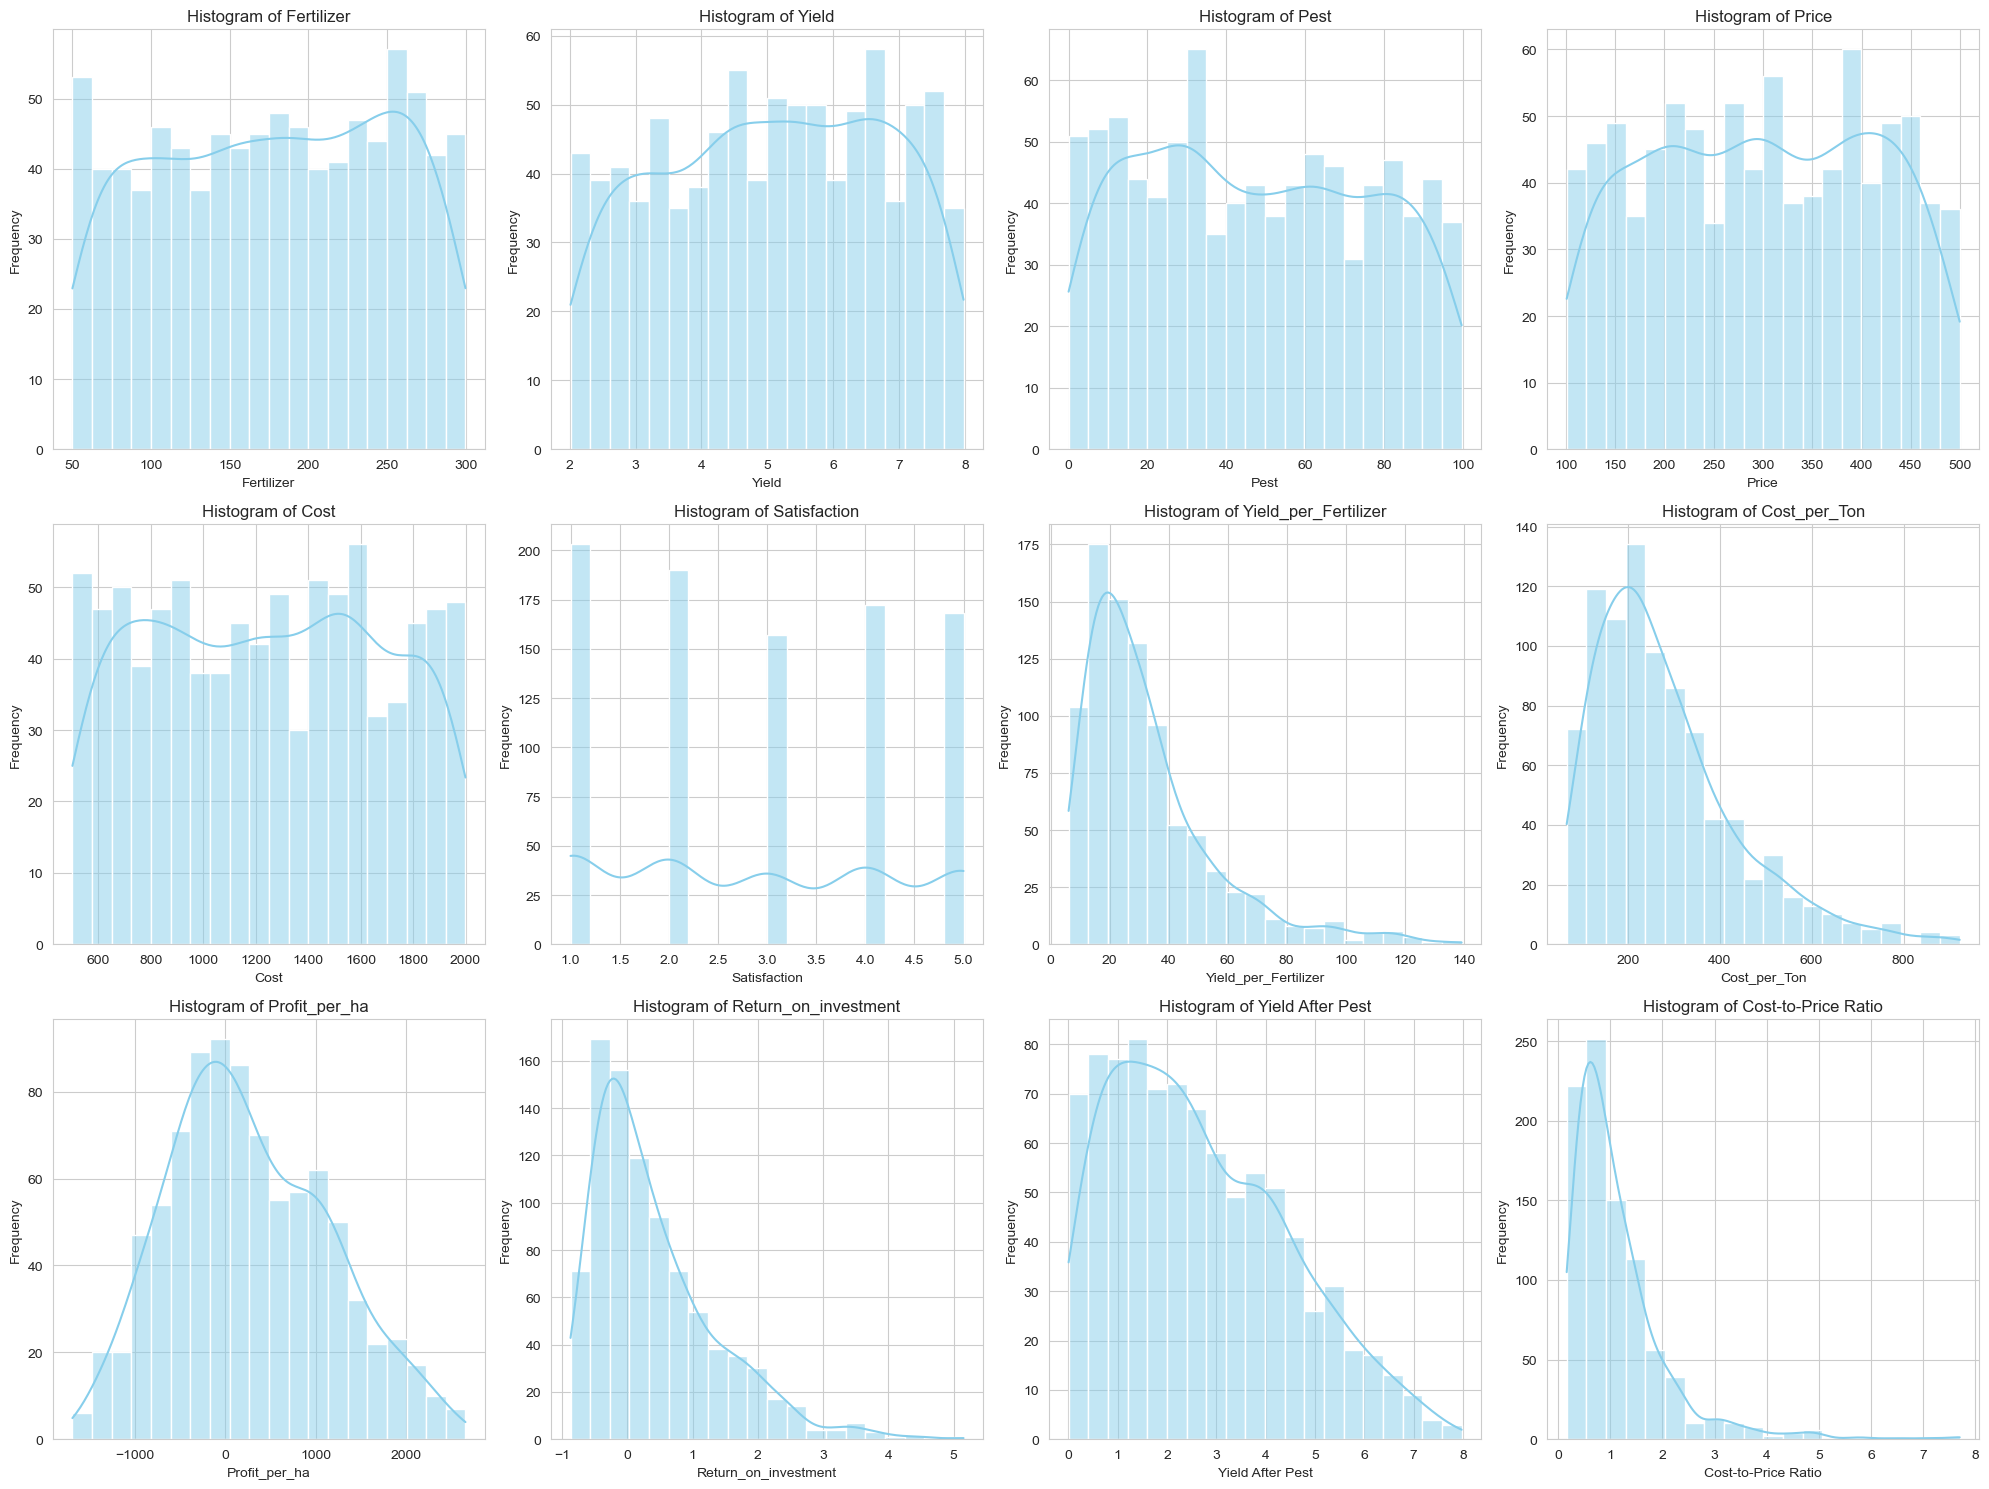

In [52]:
# Histograms of the distribution

# Set up the 3x4 grid for histograms
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=20, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

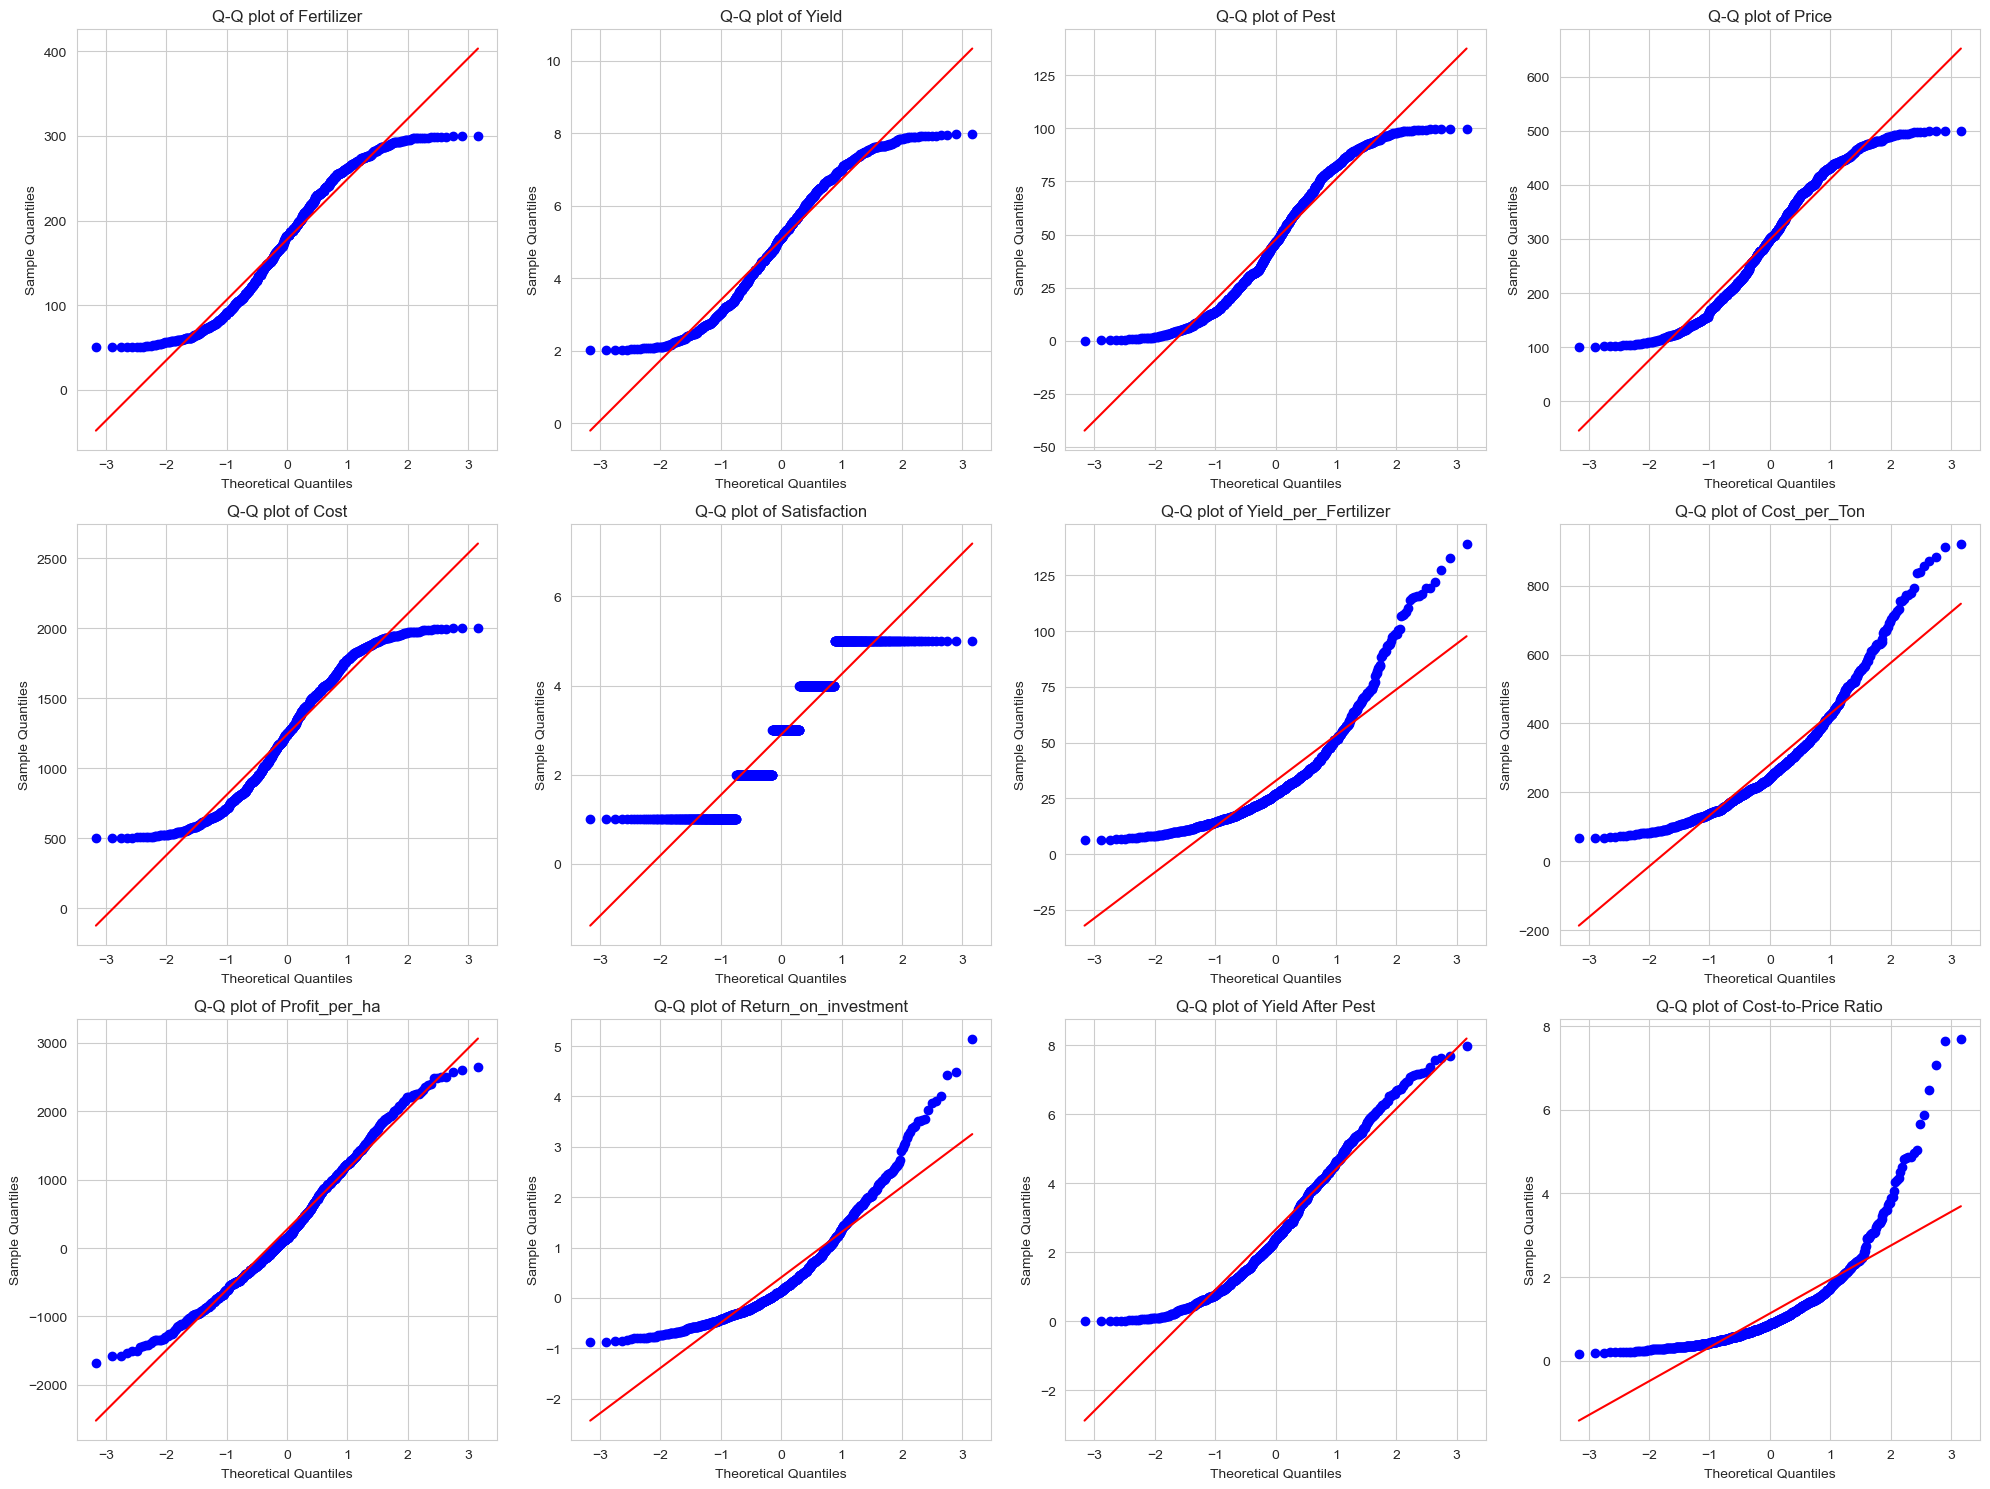

In [53]:
# QQPlot

# Set up the 3x4 grid for Q-Q plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot of {col}')
    axes[i].set_xlabel("Theoretical Quantiles")
    axes[i].set_ylabel("Sample Quantiles")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Skewness, Kurtosis and Shapiro-Wilk Test Results

| Feature               | Skewness | Kurtosis | Shapiro-W | Shapiro-p | Normality (p > 0.05) |
|-----------------------|----------|----------|-----------|-----------|-----------------------|
| Fertilizer            | -0.0677  | -1.2086  | 0.9527    | 0.0       | No                    |
| Yield                 | -0.0862  | -1.1385  | 0.9590    | 0.0       | No                    |
| Pest                  |  0.1009  | -1.2114  | 0.9516    | 0.0       | No                    |
| Price                 | -0.0159  | -1.1874  | 0.9566    | 0.0       | No                    |
| Cost                  |  0.0152  | -1.2173  | 0.9518    | 0.0       | No                    |
| Satisfaction          |  0.0941  | -1.3429  | 0.8808    | 0.0       | No                    |
| Yield_per_Fertilizer  |  1.7247  |  3.4262  | 0.8416    | 0.0       | No                    |
| Cost_per_Ton          |  1.2541  |  1.6840  | 0.9054    | 0.0       | No                    |
| Profit_per_ha         |  0.3419  | -0.4666  | 0.9840    | 0.0       | No                    |
| Return_on_investment  |  1.3569  |  2.0826  | 0.8892    | 0.0       | No                    |
| Yield After Pest      |  0.5790  | -0.4387  | 0.9552    | 0.0       | No                    |
| Cost-to-Price Ratio   |  2.7387  | 11.1917  | 0.7519    | 0.0       | No                    |


We computed skewness and kurtosis for each numeric column. Skewness measures distribution asymmetry and kurtosis measures “peakedness” or tail weight. A skewness near zero implies symmetry, while positive (negative) skew indicates a right (left) tail. Similarly, kurtosis ≈0 (excess kurtosis) implies a normal-like peak, negative values mean a flatter (platykurtic) distribution, positive mean heavy tails (leptokurtic).

Approximately symmetric distributions: `Fertilizer`, `Yield`, `Pest`, `Price`, `Cost` all have skewness ≈0 (–0.09 to +0.10) and negative kurtosis (≈–1.2) which indicate roughly symmetric, slightly flat distributions.

Light tails: Many variables (e.g. `Fertilizer`, `Yield`, `Pest`, `Price`, `Weather Stress`, `Soil Fertility`) have negative kurtosis (~–1 to –1.3) meaning the distributions are slightly flatter than normal.

Heavy-tailed/skewed: `Cost-to-Price Ratio` is highly skewed (+2.74) with very high kurtosis (+11.19) indicating a strong right tail and extreme outliers. `Return_on_investment` (skew +2.18) and `Yield_per_Fertilizer` (skew +2.88) also show right skew. Conversely, none are strongly left-skewed (all skewness > –0.1 except slight negative for `Fertilizer`). `Satisfaction` has positive kurtosis (+2.08) suggesting a peaked distribution (since it’s an ordinal 1–5 score, it clusters around the center).

In summary, aside from a few skewed ratio metrics, most basic agronomic variables are roughly symmetric. These skew/kurtosis patterns will align with the normality tests below.

For normality test, we also conducted Shapiro–Wilk tests for normality on each numeric column. Shapiro–Wilk’s null hypothesis is that the data come from a normal distribution (p-value > 0.05 suggests failing to reject normality). In our case, all tests returned p ≪ 0.05, so every numeric variable significantly deviates from normality. This is expected given the skewness/kurtosis: only near-zero skew variables might appear normal but here the sample size (890) makes even slight deviations significant. This can even see visually in Q-Q plots of the numeric variables. In summary, none of the numeric columns are strictly normal (all p<0.05).

### 2.2.3d Outliers Analysis

Outliers can be detected by the Interquartile Range (IQR) method. We compute Q1 (25th percentile) and Q3 (75th percentile) for each numeric column and define outliers as points **below Q1–1.5IQR** or **above Q3+1.5IQR**. We list the number of outliers per column and optionally their values.

For visualization, boxplots summarize distribution (min, Q1, median, Q3, max) and highlight outliers.

In [57]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers[col] = [outlier_count, f"{outlier_count/len(df)*100:.1f}%"]

outlier_df = pd.DataFrame(outliers, index=['Count', 'Percentage']).T

print("\n=== Outlier Analysis ===")
print(outlier_df)


=== Outlier Analysis ===
                     Count Percentage
Fertilizer               0       0.0%
Yield                    0       0.0%
Pest                     0       0.0%
Price                    0       0.0%
Cost                     0       0.0%
Satisfaction             0       0.0%
Yield_per_Fertilizer    48       5.4%
Cost_per_Ton            34       3.8%
Profit_per_ha            0       0.0%
Return_on_investment    28       3.1%
Yield After Pest         0       0.0%
Cost-to-Price Ratio     50       5.6%


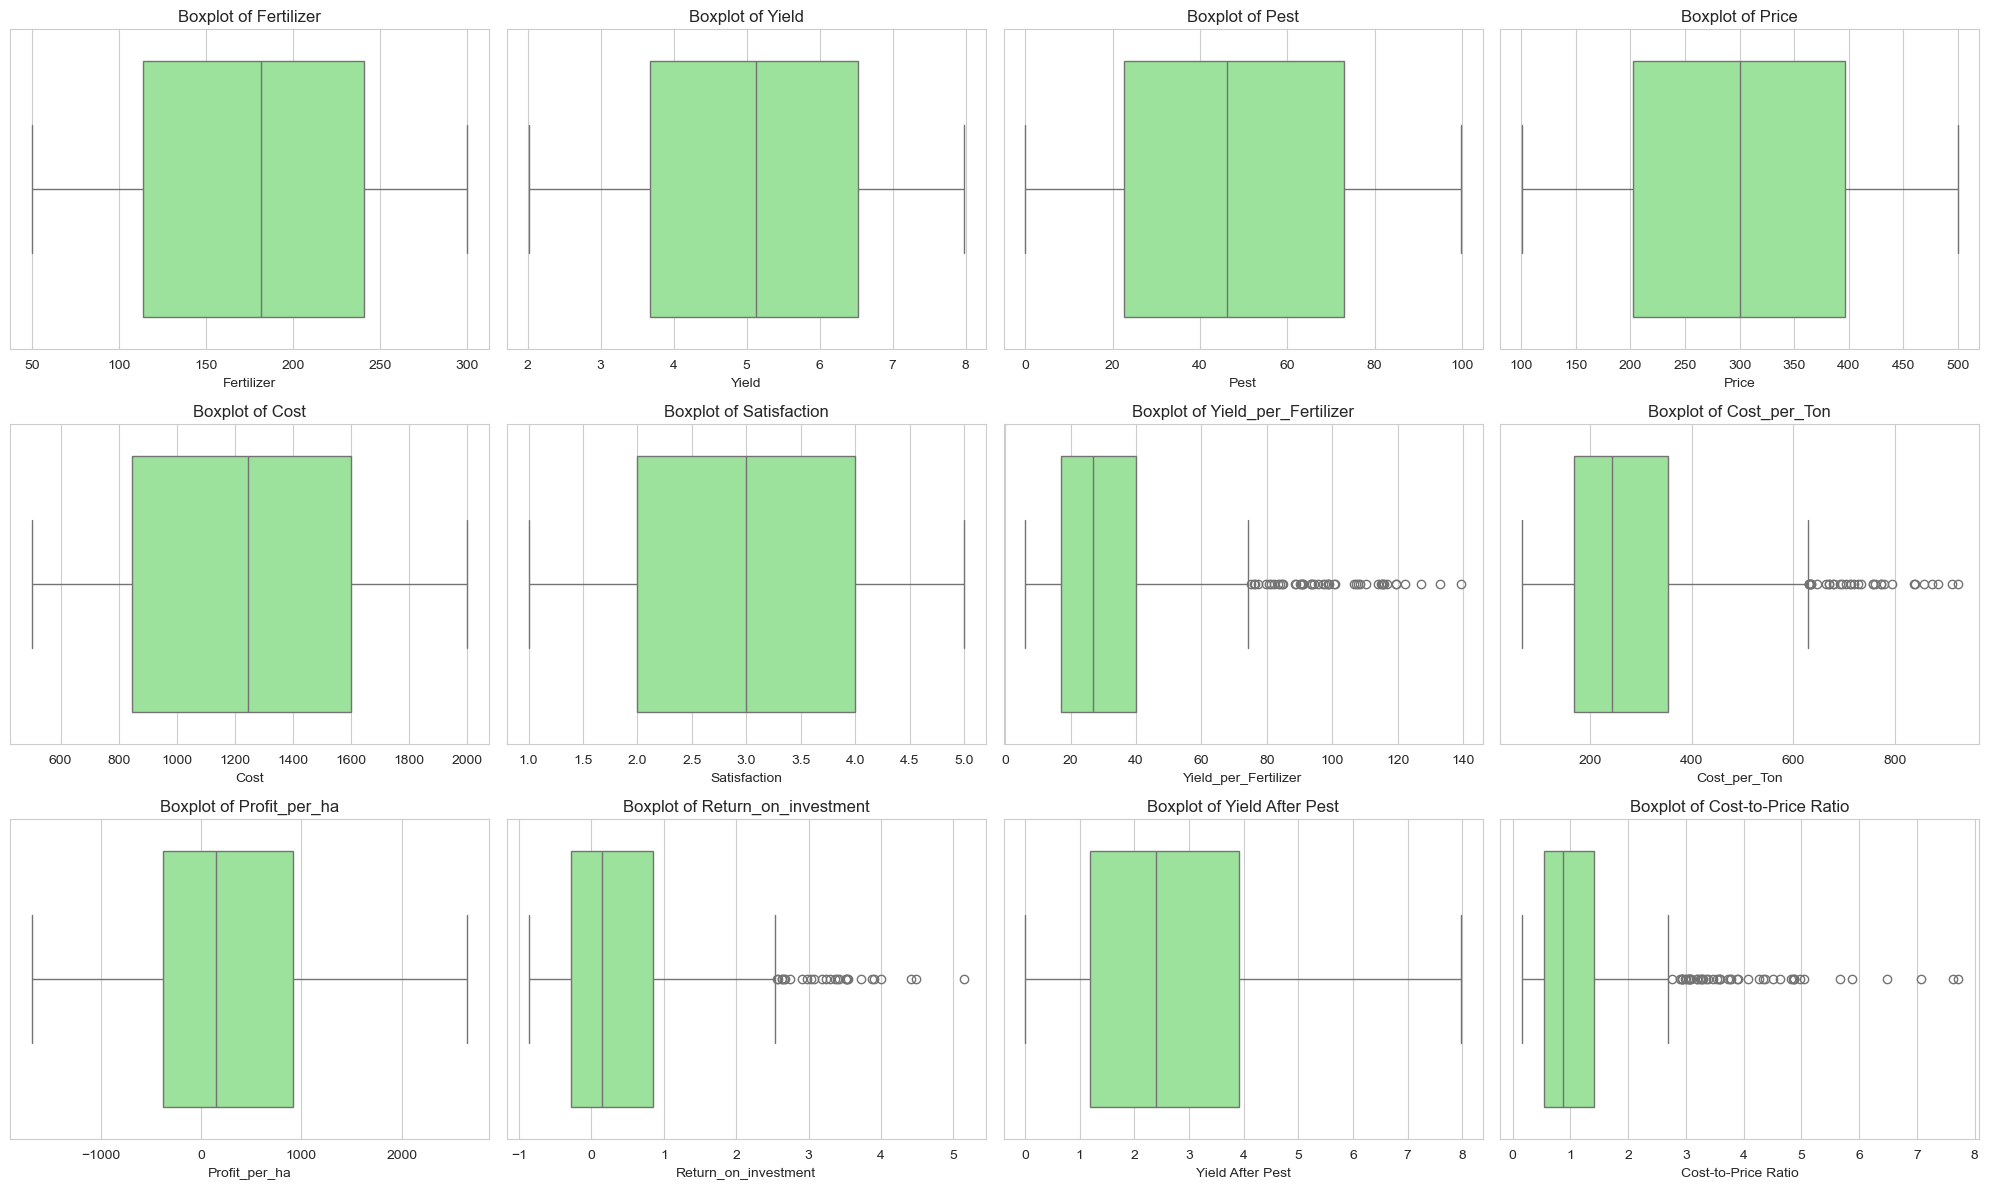

In [58]:
# Set up the 3x4 grid for boxplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Hide unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

To detect outliers, we used the interquartile range (IQR) method: values more than 1.5×IQR below Q1 or above Q3 are flagged as outliers. In a boxplot these correspond to points outside the whiskers (at Q1–1.5·IQR or Q3+1.5·IQR).

No outliers in the original variables: By IQR, `Fertilizer`, `Yield`, `Pest`, `Price` and `Cost` have no values beyond the 1.5×IQR fences, reflecting their relatively bounded ranges.

Outliers in derived metrics: Variables like `Profit_per_ha`, `Return_on_investment`, `Pest Damage Estimate`, `Yield After Pest` and `Cost-to-Price Ratio` have many IQR outliers. For example, `Return-on-investment` has 28 outliers (extreme profits) and `Cost-to-Price Ratio` has 50 outliers, consistent with their high skew and variance. These outliers are visible as points beyond the boxplot whiskers in the box plots.

Overall, these outliers could reflect genuine excellence or distress, follow-up data audits and focused field reviews will clarify whether they represent opportunities for scaling high-performing farmers or red flags for underperforming operations.

### 2.2.4 Confidence Interval

We select two meaningful groups from the dataset for comparison: North America and Australia (as examples of categorical groups) and use `Profit_per_ha` as the numeric variable. North America and Australia are chosen because they each have substantial sample sizes in the data and represent distinct geographical/agricultural conditions. Comparing these allows us to assess whether average profit per hectare differs by region. Profit per hectare is a key economic indicator of yield efficiency making it an appropriate outcome to compare between regions.

#### 2.2.4a Compute Sample Mean and Standard Error

Sample means: Compute the mean of each group: mean_A = NorthAmerica.mean(), mean_B = Australia.mean().
Standard errors: Compute the standard error of the mean for each group using the sample standard deviation (ddof=1) divided by √n.

In [61]:
# Select two groups for comparison (example: Region A vs Region B)
NorthAmerica = df[df["Region"] == "North America"]["Profit_per_ha"]
Australia = df[df["Region"] == "Australia"]["Profit_per_ha"]

# Compute sample means
mean_A = NorthAmerica.mean()
mean_B = Australia.mean()

# Compute standard errors (using sample standard deviation, ddof=1)
se_A = NorthAmerica.std(ddof=1) / np.sqrt(len(NorthAmerica))
se_B = Australia.std(ddof=1) / np.sqrt(len(Australia))

print(f"North America (n={len(NorthAmerica)}) mean = {mean_A:.2f}, SE = {se_A:.2f}")
print(f"Australia (n={len(Australia)}) mean = {mean_B:.2f}, SE = {se_B:.2f}")

North America (n=154) mean = 353.28, SE = 68.22
Australia (n=141) mean = 208.73, SE = 80.50


We use the t-distribution because the population variance is unknown and sample sizes more than 30 and are moderate. The standard error formula is 

$SE = s/\sqrt{n}$

where $s$ is the sample standard deviation.

#### 2.2.4b Compute 95% Confidence Interval

Degrees of freedom for sample: For each group, $df = n - 1$.

Critical t-value: For a 95% confidence interval (two-tailed), find $t^*$ such that the central 95% area is covered (i.e. $\alpha=0.05$).

Interval calculation: The 95% CI for each mean is:

CI 95%,A​ = (mean A​ ± t^∗⋅SE A​)

CI 95%,B​ = (mean B​ ± t^∗⋅SE B​)

In [63]:
# Compute degrees of freedom
df_A = len(NorthAmerica) - 1
df_B = len(Australia) - 1

# Compute t critical value for 95% CI
tcrit_A = stats.t.ppf(0.975, df_A)
tcrit_B = stats.t.ppf(0.975, df_B)

# Calculate confidence intervals
ci_A = (mean_A - (tcrit_A * se_A), mean_A + (tcrit_A * se_A))
ci_B = (mean_B - (tcrit_B * se_B), mean_B + (tcrit_B * se_B))

print(f"95% CI for North America: [{ci_A[0]:.2f}, {ci_A[1]:.2f}]")
print(f"95% CI for Australia: [{ci_B[0]:.2f}, {ci_B[1]:.2f}]")

95% CI for North America: [218.50, 488.06]
95% CI for Australia: [49.59, 367.87]


This yields 95% CIs: North America ~ [218.50, 488.06] and Australia ~ [49.59, 367.87]. These intervals are computed using Student’s $t$-distribution, which is appropriate here since we estimated the standard deviation from each sample.

### 2.2.4c Compare Intervals
Comparing the two 95% CIs tells us about potential differences in population means. The 95% confidence intervals for the two regions are:

- North America: [218.50, 488.06]
- Australia: [49.59, 367.87]. 

These intervals overlap, specifically in the range between approximately 218.50 and 367.87. This overlap suggests that although North America has a higher mean profit per hectare (353.28) compared to Australia (208.73), the difference between the two means may not be statistically significant at the 95% confidence level.

In other words, we cannot confidently conclude that the observed difference in sample means reflects a true difference in the population means. The overlapping intervals indicate that there's a reasonable possibility that both regions could have similar underlying average profits when accounting for sampling variability.

To draw a stronger inference, a formal hypothesis test (e.g. two-sample t-test) would be appropriate to determine if the difference is statistically significant. However, based solely on the confidence intervals, the result is inconclusive and we do not have strong evidence to claim a significant difference between the two regions.

## 2.2.5 Inferential Statistics
Given none of the variables are normally distributed, we conduct the following three hypothesis tests to identify key drivers of wheat yield (target variable) using common agricultural predictors.

1. `Yield` vs `Region` Krushal-Wallis Test
2. `Satisfaction` vs `Yield` Mann Whitney U Test
3. `Soil` vs  `Yield` Krushal-Wallis Test

### 2.2.5a `Yield` vs `Region` Krushal-Wallis Test
Both are continuous variables and we need to verify the assumptions first to decide whether to use ANOVA or Krushal-Wallis tests.

- Normality: Checked via Shapiro-Wilk test.
- Homogeneity of variances: Tested using Levene’s test.
- Independence: Assumed based on study design.

If these assumptions are not met, we use a non-parametric alternative, the Kruskal-Wallis test.

In [67]:
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro, levene, kruskal
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Check assumptions
print("Shapiro-Wilk normality test:")
for region in df['Region'].unique():
    stat, p = shapiro(df[df['Region'] == region]['Yield'])
    print(f"{region}: p = {p:.3f}")

stat, p_levene = levene(*[df[df['Region'] == region]['Yield'] for region in df['Region'].unique()])
print(f"Levene’s test for homogeneity: p = {p_levene:.3f}")

Shapiro-Wilk normality test:
Europe: p = 0.000
North America: p = 0.000
Asia: p = 0.000
Australia: p = 0.001
Africa: p = 0.000
South America: p = 0.000
Levene’s test for homogeneity: p = 0.869


Shapiro-Wilk normality p-values for each region are all < 0.05, indicating non-normality. Levene’s test p = 0.869, indicating homogeneity of variances. Since the normality assumption is violated, we proceed with the Kruskal–Wallis test, a non-parametric alternative to ANOVA.

If p < 0.05, reject H₀: at least one region’s median yield differs.

If p ≥ 0.05, fail to reject H₀: no evidence of differences in median yield across regions.

In [69]:
groups = [df[df['Region'] == region]['Yield'] for region in df['Region'].unique()]
h_stat, p_kw = kruskal(*groups)
print(f"Kruskal-Wallis test: H = {h_stat:.3f}, p = {p_kw:.3f}")

Kruskal-Wallis test: H = 4.452, p = 0.486


Krushal-Wallis test p ≥ 0.05 thus we fail to reject H₀ and there is no evidence of differences in median yield across regions.

### 2.2.5b `Satisfaction` vs `Yield` Mann-Whitney U Test
`Satisfaction` is an ordinal variable (1-5) and `Return-on-investment` is continuous and we need to verify the assumptions for Paired t-test prior to applying parametric tests.

- Normality: Checked via Shapiro-Wilk test.
- Homogeneity of variances: Tested using Levene’s test.
- Independence: Assumed based on study design.

If these assumptions are not met, we use a non-parametric alternative, Pairwise Mann–Whitney U Test.

In [72]:
# Perform Shapiro-Wilk for each satisfaction level
levels = sorted(df['Satisfaction'].unique())
print("Shapiro-Wilk test for Return_on_investment by Satisfaction:")
for lvl in levels:
    data = df[df['Satisfaction'] == lvl]['Return_on_investment']
    stat, p = shapiro(data)
    print(f"Level {lvl}: p = {p:.3f}")

Shapiro-Wilk test for Return_on_investment by Satisfaction:
Level 1: p = 0.000
Level 2: p = 0.000
Level 3: p = 0.000
Level 4: p = 0.000
Level 5: p = 0.000


In [73]:
stat, p_levene = levene(*[df[df['Satisfaction'] == lvl]['Return_on_investment'] for lvl in df['Satisfaction'].unique()])
print(f"Levene’s test for homogeneity: p = {p_levene:.3f}")

Levene’s test for homogeneity: p = 0.781


Shapiro-Wilk normality p-values for each Satisfaction level are all < 0.05, indicating non-normality. Levene’s test p = 0.781, indicating homogeneity of variances. Since the normality assumption is violated, we proceed with the Pairwise Mann–Whitney U Test, a non-parametric alternative to t-test and ANOVA. The significance level was set at α = 0.05. 

In [75]:
from itertools import combinations
from scipy.stats import mannwhitneyu

results = []
for lvl1, lvl2 in combinations(levels, 2):
    level1 = df[df['Satisfaction'] == lvl1]['Yield']
    level2 = df[df['Satisfaction'] == lvl2]['Yield']
    stat_u, p_u = mannwhitneyu(level1, level2, alternative='two-sided')
    results.append((lvl1, lvl2, stat_u, p_u))
    print(f"Level {lvl1} vs {lvl2}: U = {stat_u:.3f}, p = {p_u:.3f}")

Level 1 vs 2: U = 19032.000, p = 0.822
Level 1 vs 3: U = 15875.000, p = 0.951
Level 1 vs 4: U = 18272.000, p = 0.437
Level 1 vs 5: U = 16501.000, p = 0.592
Level 2 vs 3: U = 15090.000, p = 0.851
Level 2 vs 4: U = 17344.000, p = 0.313
Level 2 vs 5: U = 15662.000, p = 0.761
Level 3 vs 4: U = 14086.000, p = 0.498
Level 3 vs 5: U = 12798.000, p = 0.645
Level 4 vs 5: U = 13382.000, p = 0.240


We conducted pairwise Mann–Whitney U tests to assess whether the distribution of `Yield` significantly differs across levels of `Satisfaction` (from 1 = very dissatisfied to 5 = very satisfied).

All p-values are greater than 0.05, indicating no statistically significant difference in `Yield` between any pair of `Satisfaction` levels. Therefore, we fail to reject the null hypothesis for all comparisons.

### 2.2.5c `Soil` vs `Yield` Krushal-Wallis Test

Both are continuous variables and we need to verify the assumptions prior to applying parametric tests.

- Normality: Checked via Shapiro-Wilk test.
- Homogeneity of variances: Tested using Levene’s test.
- Independence: Assumed based on study design.

If these assumptions are not met, we use a non-parametric alternative, the Kruskal-Wallis test.

In [77]:
# Check assumptions
print("Shapiro-Wilk normality test:")
for soil in df['Soil'].unique():
    stat, p = shapiro(df[df['Soil'] == soil]['Yield'])
    print(f"{soil}: p = {p:.3f}")

stat, p_levene = levene(*[df[df['Soil'] == soil]['Yield'] for region in df['Soil'].unique()])
print(f"Levene’s test for homogeneity: p = {p_levene:.3f}")

Shapiro-Wilk normality test:
Silt: p = 0.000
Saline: p = 0.000
Loamy: p = 0.000
Sandy: p = 0.000
Peaty: p = 0.006
Levene’s test for homogeneity: p = 1.000


Shapiro-Wilk normality p-values for each soil are all < 0.05, indicating non-normality. Levene’s test p = 0.869, indicating homogeneity of variances. Since the normality assumption is violated, we then proceed with the non-paramatric alternative to ANOVA, Kruskal–Wallis test.

If p < 0.05, reject H₀: at least one soil’s median yield differs.

If p ≥ 0.05, fail to reject H₀: no evidence of differences in median yield across soils.

In [79]:
groups = [df[df['Soil'] == soil]['Yield'] for soil in df['Soil'].unique()]
h_stat, p_kw = kruskal(*groups)
print(f"Kruskal-Wallis test: H = {h_stat:.3f}, p = {p_kw:.3f}")

Kruskal-Wallis test: H = 3.175, p = 0.529


Krushal-Wallis test p ≥ 0.05 thus we fail to reject H₀ and there is no evidence of significant differences in median yield across soils.

### 2.2.6 Correlation Analysis
To identify potential predictors for our target variable, we start by calculating Pearson correlations between numerical features and yield.

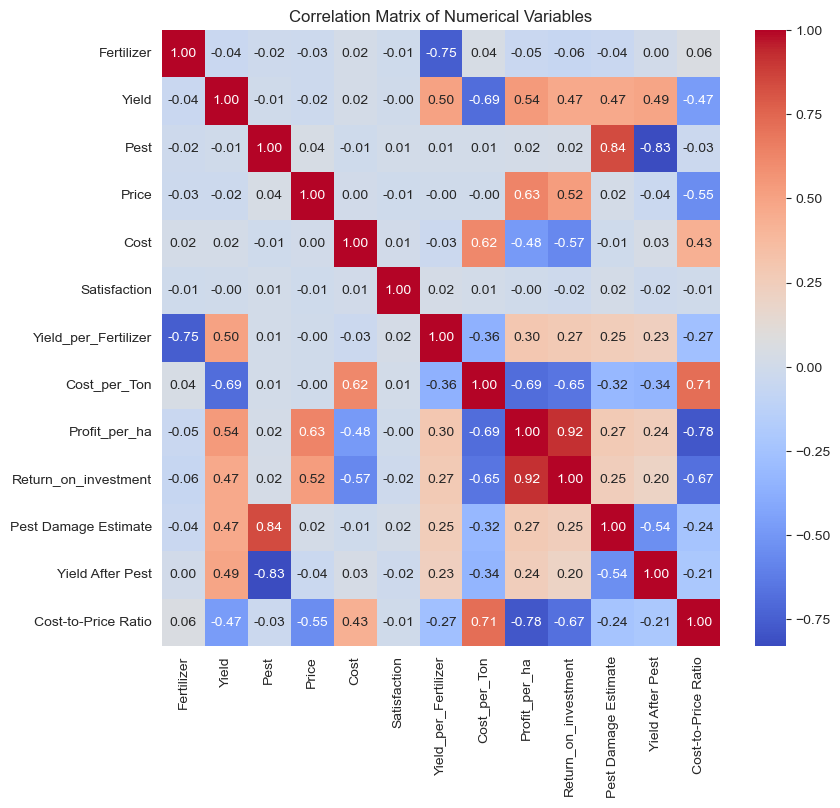

In [82]:
# Correlation analysis
plt.figure(figsize=(9, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.savefig('co.jpg')
plt.show()

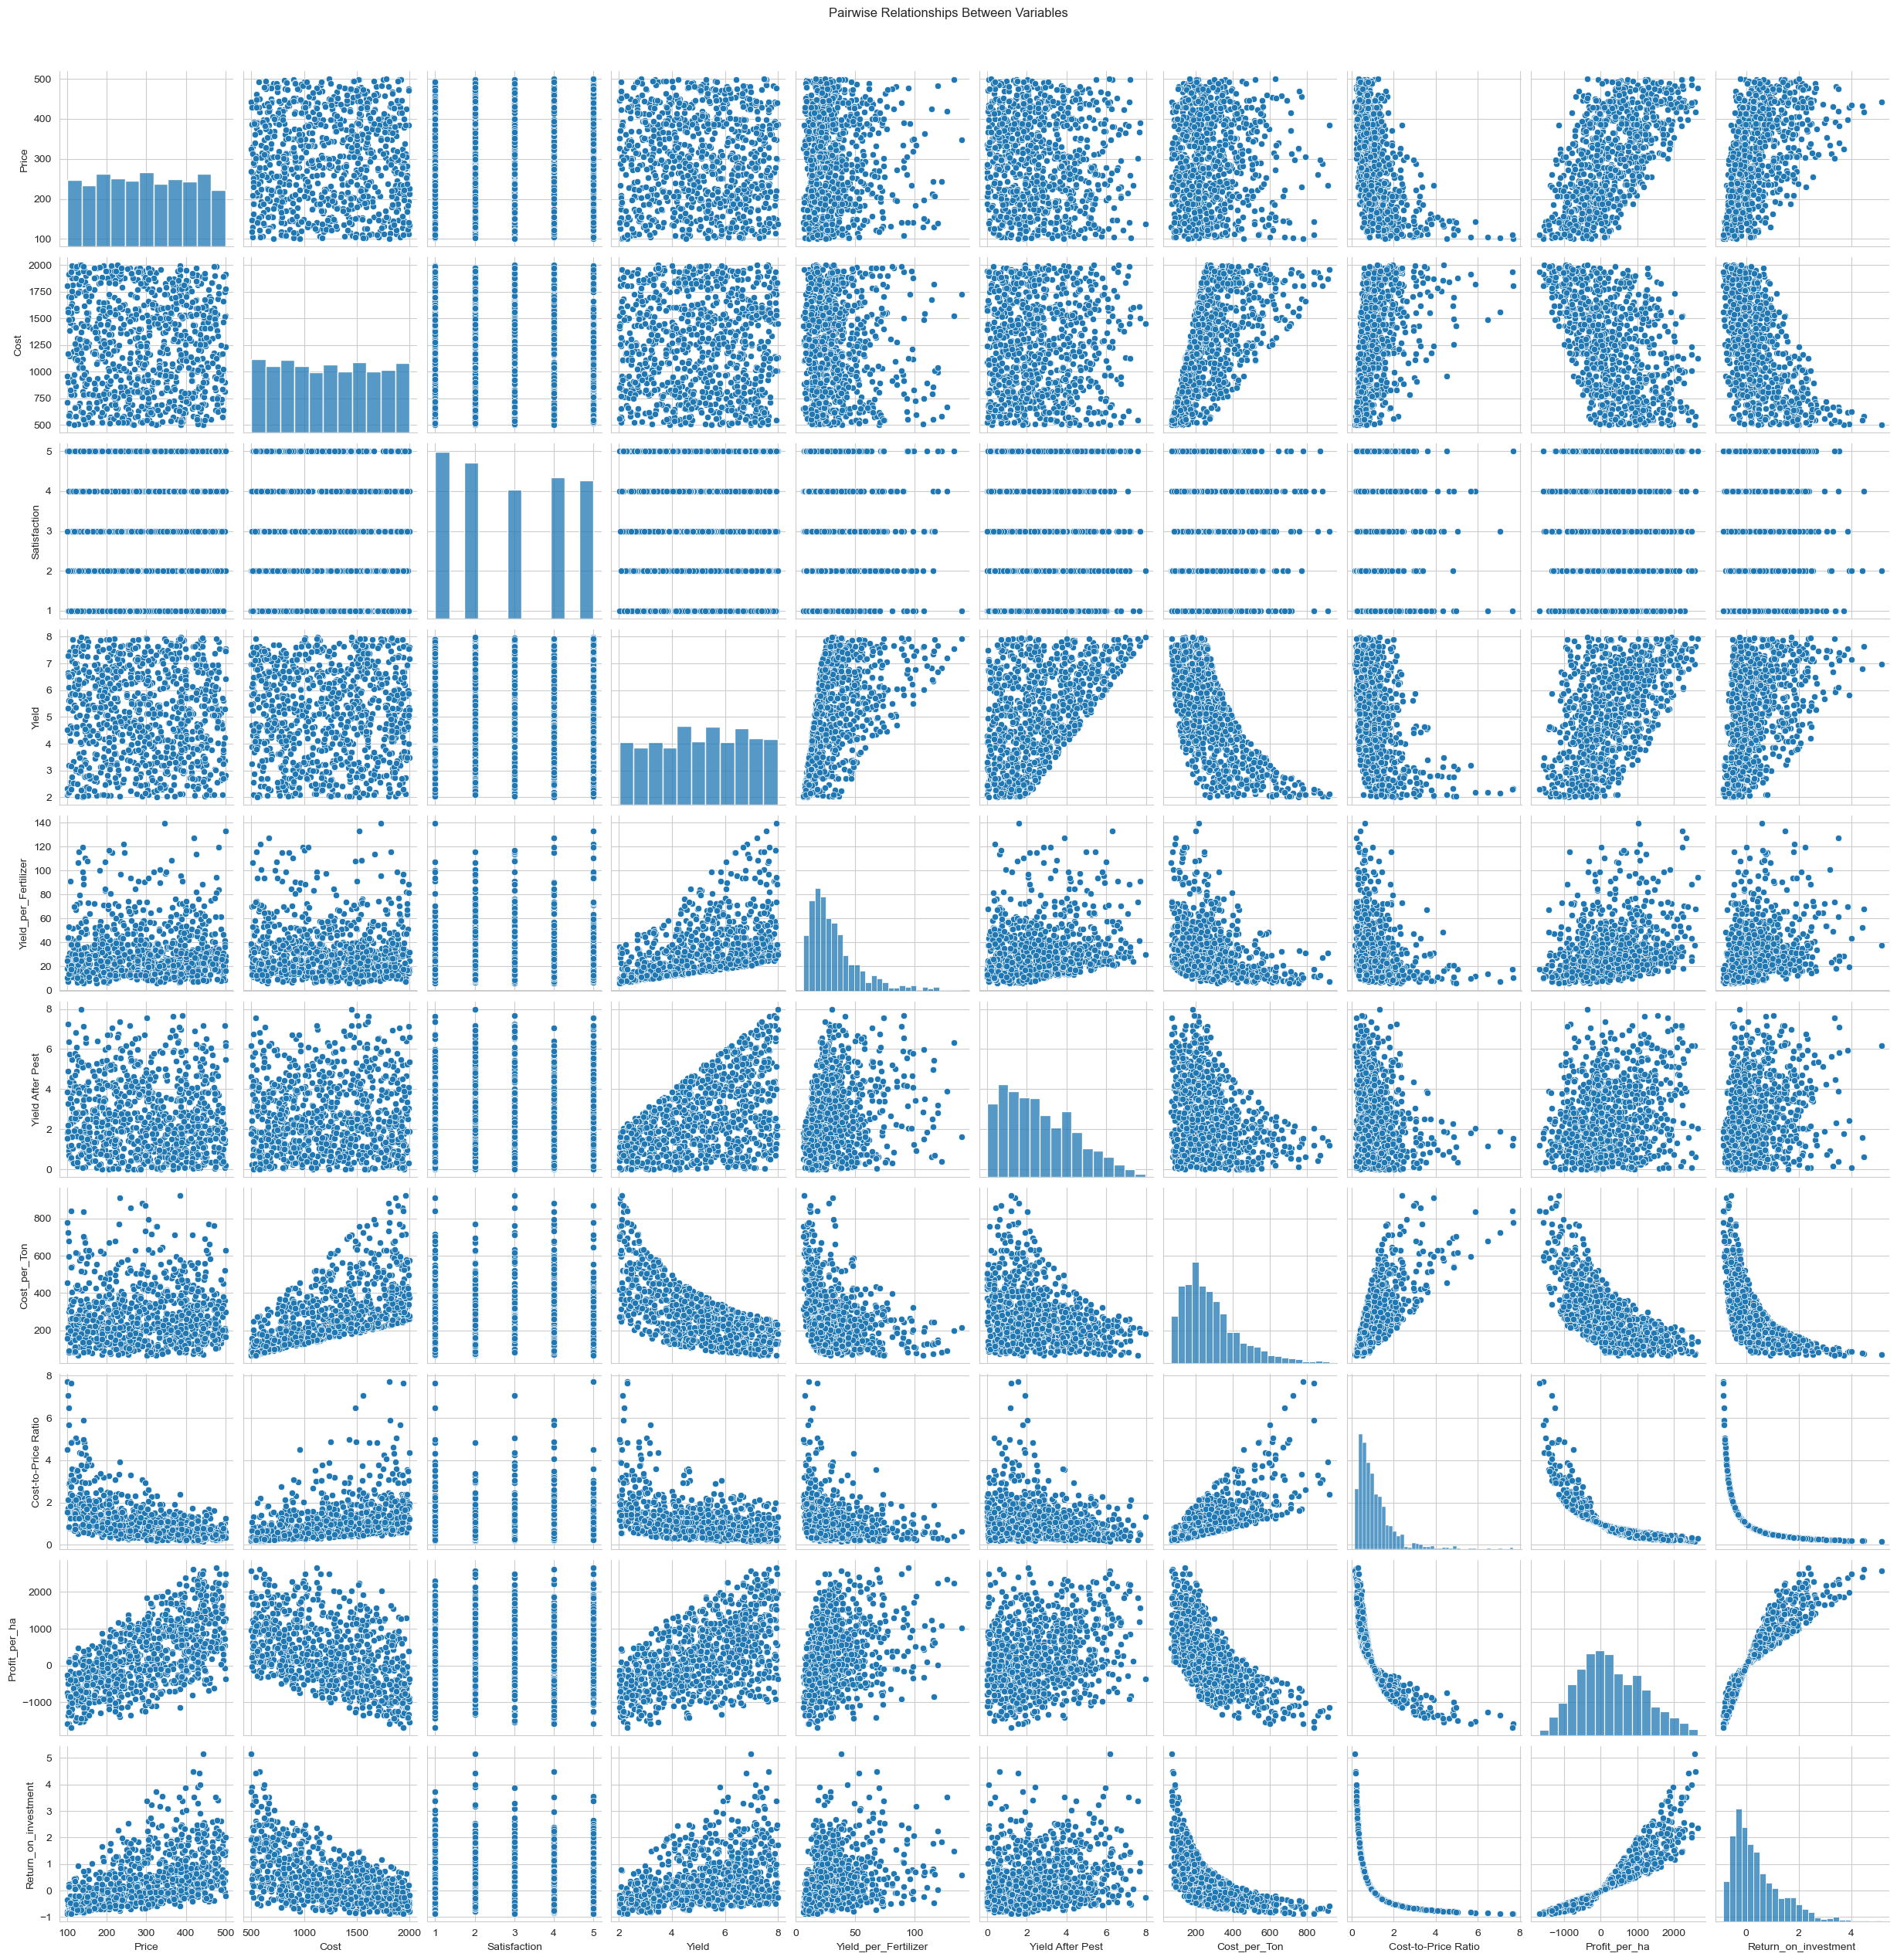

In [83]:
# Pairplot for numerical variables
sns.pairplot(df[['Price', 'Cost', 'Satisfaction', 
                'Yield', 'Yield_per_Fertilizer', 'Yield After Pest', 
                'Cost_per_Ton', 'Cost-to-Price Ratio',  
                 'Profit_per_ha', 'Return_on_investment']]
                 )
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.savefig('pair.jpg')
plt.show()

Fertilizer efficiency is strongly inversely correlated with raw fertilizer use (–0.75) and moderately positively correlated with yield (0.50).
Cost per ton is highly negatively correlated with yield (–0.69) and positively correlated with the cost-to-price ratio (0.71), while profit per hectare and ROI are nearly perfectly correlated (0.92).
Pest damage estimate aligns closely with pest levels (0.84) and is strongly inversely correlated with post-pest yield (0.83).

### 2.2.7 Chi-square Test of Association for Categorical Features

To examine whether the categorical variables (`Region`, `Weather`, `Soil`) have a statistically significant association with Yield Category (e.g., Low, Medium, High), chi-square tests of independence were conducted and alpha value is set at 0.05.

In [86]:
# Create yield categories (Low/Medium/High) by quantiles
df['Yield_Category'] = pd.qcut(df['Yield'], 3, labels=['Low', 'Medium', 'High'])

# Import chi2 test
from scipy.stats import chi2_contingency

# Chi-square test for categorical features
cat_features = ['Region', 'Weather', 'Soil']
chi2_results = {}

for feature in cat_features:
    contingency_table = pd.crosstab(df[feature], df['Yield_Category'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = {'chi2': chi2, 'p': p}

# Display results
print("Chi-Square Test Results:")
for feat, vals in chi2_results.items():
    print(f"{feat}: χ² = {vals['chi2']:.2f}, p = {vals['p']:.4f}")

Chi-Square Test Results:
Region: χ² = 7.80, p = 0.6484
Weather: χ² = 12.35, p = 0.1364
Soil: χ² = 7.78, p = 0.4550


`Region` and `Yield` Category:

There is no statistically significant association between the region and Yield Category indicating that yield levels are distributed similarly across different regions.

`Weather` and `Yield` Category:

No significant relationship was found between weather conditions and yield category, suggesting that weather types do not significantly influence yield classification in this dataset.

`Soil` and `Yield` Category:

The analysis did not reveal a significant association between soil types and yield category, implying that soil type may not be a strong differentiating factor for yield levels in this sample.

All p-values are greater than the standard alpha level (0.05), so we fail to reject the null hypothesis in all three cases. This suggests that Region, Weather, and Soil do not have a significant relationship with Yield Category based on the chi-square test.

### 2.2.8 Baseline Linear Regression Model with original features
For initial linear regression model, we will use the original features in the dataset first to explore the relationships. Becasue if we include derived metrics featured directly geenrated from `Yield`, it will lead to data leakage and causes biased and overly optimistic model performance and should be avoided.

In [89]:
# One-hot encoding for categorical data
df_stats = pd.get_dummies(df, columns=['Region', 'Weather', 'Soil'], drop_first=True)

# Features and target
X_stats = df_stats.drop(['Yield', 'Yield_Category', 'Yield_per_Fertilizer', 
                         'Yield After Pest', 'Profit_per_ha', 'Pest Damage Estimate',
                        'Cost-to-Price Ratio', 'Cost_per_Ton', 'Return_on_investment'], axis = 1)
y_stats = df_stats['Yield']

# Ensure all data in X are numeric
X_stats = X_stats.astype({col: int for col in X_stats.select_dtypes('bool').columns})

# Verify
X_stats.head()

Fertilizer       Pest       Price         Cost  Satisfaction  Region_Asia  \
0  231.288932  18.267238  401.139462  1525.682301             5            0   
1   97.797675  13.959887  393.143675  1629.678271             2            0   
2  134.565776  57.647244  450.476991  1591.178587             1            1   
3  127.174686  76.188361  389.113840  1804.424687             3            0   
4  286.758997  78.150565  192.736517   784.165150             5            0   

   Region_Australia  Region_Europe  Region_North America  \
0                 0              1                     0   
1                 0              0                     1   
2                 0              0                     0   
3                 0              0                     1   
4                 0              0                     1   

   Region_South America  Weather_Drought  Weather_Rainy  Weather_Stormy  \
0                     0                0              0               0   
1                     0                0              0               0   
2                     0                0              1               0   
3                     0                0              0               0   
4                     0                0              1               0   

   Weather_Sunny  Soil_Peaty  Soil_Saline  Soil_Sandy  Soil_Silt  
0              0           0            0           0          1  
1              0           0            1           0          0  
2              0           0            1           0          0  
3              1           0            0           0          0  
4              0           0            0           1          0

In [90]:
import statsmodels.api as sm

# Add intercept and fit model
X_stats = sm.add_constant(X_stats)
model = sm.OLS(y_stats, X_stats).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9422
Date:                Wed, 21 May 2025   Prob (F-statistic):              0.527
Time:                        02:53:42   Log-Likelihood:                -1723.5
No. Observations:                 890   AIC:                             3485.
Df Residuals:                     871   BIC:                             3576.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.2877 

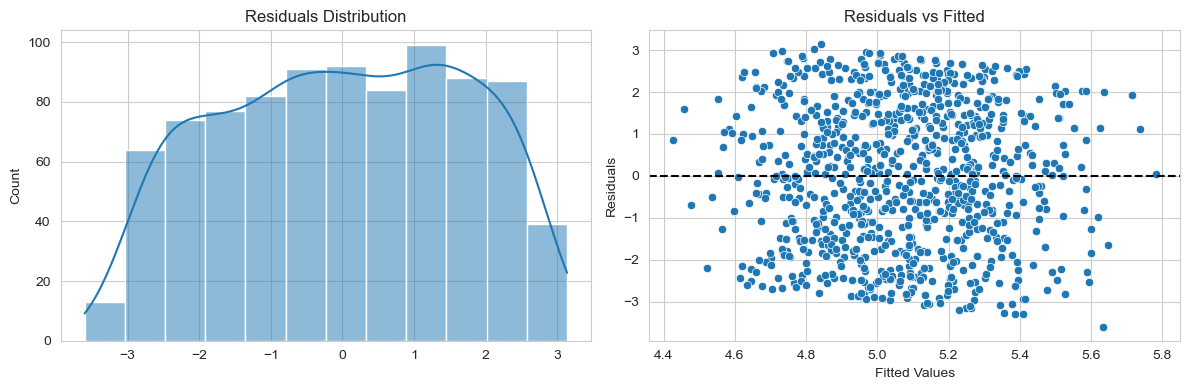

In [91]:
# Residual diagnostics
res = model.resid
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Residual histogram
sns.histplot(res, kde=True, ax=ax[0])
ax[0].set_title('Residuals Distribution')
# Residuals vs Fitted
sns.scatterplot(x=model.fittedvalues, y=res, ax=ax[1])
ax[1].axhline(0, color='black', linestyle='--')
ax[1].set_xlabel('Fitted Values'); ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals vs Fitted')
plt.tight_layout()
plt.show()

The regression model using original features reveals important limitations in predicting wheat yield based solely on raw variables. With an extremely low R-squared of 0.019, the model explains less than 2% of the total variance in crop yields.

Model Performance
The key findings from this initial model are concerning but informative:

R-squared = 0.019: The model explains only 1.9% of yield variability, with adjusted R-squared being slightly negative (-0.001), indicating poor fit adjusted for the number of predictors.

F-statistic p-value = 0.527: The overall model fails to reach statistical significance, suggesting that collectively, these unmodified features do not reliably predict wheat yield variations.

No significant predictors: None of the individual variables show statistical significance (all p>0.05), indicating that in their raw form, these features lack predictive power for yield.

Residual plots: The residuals are symmetrically distributed around zero but show substantial scatter, reflecting the model's inability to capture systematic patterns in the data.

This model serves as a baseline that demonstrates the necessity of developing derived features like fertilizer efficiency ratios, profit margins and cost-per-unit metrics to reveal meaningful patterns. We should also proceed with using non-linear models such as Random Forest and Gradient Boosting because there is no linearity in the original features of the dataset.

### 2.3 Data Encoding
Most machine learning models (especially linear regression, tree-based models and neural networks) **do not understand raw categorical data**. They require numerical inputs to perform mathematical operations. Encoding allows us to **transform categorical variables into numerical representations** that the models can process effectively.

There are two main types of encoding:
- **Ordinal Encoding**: When categories have a meaningful order (e.g., "Low", "Medium", "High").
- **Nominal (One-Hot) Encoding**: When categories are distinct but unordered (e.g., "Asia", "Europe", "Africa").

Appropriate encoding helps the model learn better relationships, avoid introducing bias, and improve predictive performance.

1. Weather conditions significantly influence wheat growth and they can be ranked from most to least stressful. This ordinal scale reflects the agricultural impact of each condition where Drought causes severe stress (0), Stormy(1), Cloudy(2), Rainy (3) and Sunny is most favorable for wheat (4). This allows models to learn from the progressive improvement in weather favorability.
2. Soil type is a critical factor in crop performance. This encoding captures the commonly accepted fertility ranking for general crop cultivation where Loamy is highly fertile and ideal (4), Slit (3), Peaty(2), Sandy(1) and Saline is the least suitable due to poor nutrient content and salt presence (0). Ordinal encoding is appropriate here because soil types can be ranked based on their general suitability for agriculture.
3. The Region variable has no inherent order, "Asia" is not higher or lower than "Africa". Hence, we use one-hot encoding, which creates a binary column for each region and prevents the model from making false ordinal assumptions and ensures that each region is treated as a unique category.

In [94]:
# Encoding
# 1. Weather Stress Level (assigning ordinal values, higher is better)
weather_stress_map = {
    'Drought': 0,   # Highest stress
    'Stormy': 1,
    'Cloudy': 2,
    'Rainy': 3,
    'Sunny': 4     # Lowest stress
}

df['Weather Stress'] = df['Weather'].map(weather_stress_map)

# Soil Fertility (assigning ordinal values, higher is better)
soil_fertility_map = {
    'Loamy': 4,
    'Silt': 3,
    'Peaty': 2,
    'Sandy': 1,
    'Saline': 0
}

df['Soil Fertility'] = df['Soil'].map(soil_fertility_map)


# One-hot encode to Region
df = pd.get_dummies(df, columns=['Region'],
                        prefix='Region',
                        drop_first=False)

### 2.4 Feature Scaling
Before training most machine-learning models, we need to rescale our features so that no single variable with a large numeric range dominates the learning algorithm. We have two distinct groups of features here and we will use the hybrid approach.

1. **Ordinal scores** (`Weather Stress`, `Soil Fertility`, `Satisfaction`)  
2. **Continuous agronomic and economic measures** (`Fertilizer`, `Yield`, `Pest`, `Price`, `Cost`, and the derived ratios)

**StandardScaler for Ordinal Scores**

Our features take only a handful of integer values (e.g. 0–4 or 1–5). We want them on the same scale as the continuous variables so that their magnitude (the ordering) still matters, but they don’t get swamped by values like fertilizer amounts in the hundreds. Centering ensures that 0 represents the “average” stress/fertility/satisfaction level and unit variance makes each step in the ordinal scale equally weighted.

In [96]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Define columns for each scaler
standard_cols = ['Weather Stress', 'Soil Fertility', 'Satisfaction',
                 'Fertilizer', 'Yield', 'Pest', 'Price', 'Cost', 
                 'Yield_per_Fertilizer', 'Cost_per_Ton', 'Profit_per_ha', 
                 'Return_on_investment', 'Cost-to-Price Ratio',
                 'Pest Damage Estimate', 'Yield After Pest']

# Define scalers
scaler_standard = StandardScaler()

# Create a copy of original df to hold scaled values
df_scaled = df.copy()

# Fit & transform each subset separately
df_scaled[standard_cols] = scaler_standard.fit_transform(df[standard_cols])

# Verify
df_scaled.describe().T

count          mean       std       min       25%  \
Fertilizer            890.0  1.197544e-16  1.000562 -1.749440 -0.873819   
Yield                 890.0  1.646623e-16  1.000562 -1.804953 -0.826806   
Pest                  890.0 -1.057830e-16  1.000562 -1.639101 -0.862340   
Price                 890.0 -2.734392e-16  1.000562 -1.742729 -0.851983   
Cost                  890.0  4.790176e-16  1.000562 -1.678157 -0.892766   
Satisfaction          890.0  8.183217e-17  1.000562 -1.323169 -0.627176   
Yield_per_Fertilizer  890.0 -1.077790e-16  1.000562 -1.196091 -0.704568   
Cost_per_Ton          890.0 -2.395088e-17  1.000562 -1.378208 -0.718084   
Profit_per_ha         890.0  8.981580e-18  1.000562 -2.205086 -0.729352   
Return_on_investment  890.0  3.991813e-17  1.000562 -1.346922 -0.734208   
Pest Damage Estimate  890.0  1.037871e-16  1.000562 -1.372751 -0.813151   
Yield After Pest      890.0  5.987720e-17  1.000562 -1.485468 -0.824520   
Cost-to-Price Ratio   890.0 -1.197544e-16  1.000562 -1.040674 -0.634576   
Weather Stress        890.0  6.187310e-17  1.000562 -1.380301 -0.669382   
Soil Fertility        890.0  1.596725e-17  1.000562 -1.376055 -0.693397   

                           50%       75%       max  
Fertilizer            0.057497  0.865480  1.680495  
Yield                 0.034230  0.855935  1.716680  
Pest                 -0.045014  0.872921  1.794895  
Price                 0.010796  0.861296  1.766213  
Cost                  0.012505  0.815994  1.722674  
Satisfaction          0.068817  0.764811  1.460804  
Yield_per_Fertilizer -0.269733  0.326173  4.777229  
Cost_per_Ton         -0.241771  0.468528  4.150243  
Profit_per_ha        -0.140938  0.732663  2.688135  
Return_on_investment -0.283018  0.461606  4.989008  
Pest Damage Estimate -0.194244  0.639977  2.878599  
Yield After Pest     -0.151071  0.702740  2.976731  
Cost-to-Price Ratio  -0.274485  0.291896  7.049572  
Weather Stress        0.041537  0.752456  1.463375  
Soil Fertility       -0.010738  0.671920  1.354578

### 2.5 Separate Features and Target
To fully prepare the dataset for analysis after cleaning, we first need to separate the features (X) from the target variable (y) in the dataset. The target variable `Yield` was continuous values. We also need to drop the features directly generated from `Yield` to avoid data leakage and wrong conclusion.

For PCA and LDA, we will create target classes by also splitting into 3 splits by 33rd quantile and 66th quantile as `Low`, `Medium` and `High`.

In [98]:
df_scaled.head()

Weather    Soil  Fertilizer     Yield      Pest     Price      Cost  \
0  Cloudy    Silt    0.738331  0.109079 -1.010834  0.899686  0.646966   
1  Cloudy  Saline   -1.094004 -1.282283 -1.159129  0.829331  0.882932   
2   Rainy  Saline   -0.589315 -0.463875  0.344949  1.333806  0.795577   
3   Sunny   Loamy   -0.690767 -0.344242  0.983287  0.793872  1.279429   
4   Rainy   Sandy    1.499728  0.857614  1.050842 -0.934049 -1.035526   

   Satisfaction  Yield_per_Fertilizer  Cost_per_Ton  Profit_per_ha  \
0      1.460804             -0.546425      0.065317       0.351502   
1     -0.627176             -0.265303      1.824081      -0.857869   
2     -1.323169             -0.175453      0.589375       0.076978   
3      0.068817             -0.035317      0.788144      -0.370891   
4      1.460804             -0.545306     -1.034374       0.228410   

   Return_on_investment  Pest Damage Estimate  Yield After Pest  \
0             -0.029382             -0.826698          0.916998   
1             -0.747834             -1.142966         -0.092573   
2             -0.206989              0.033018         -0.472830   
3             -0.465194              0.573266         -0.890858   
4              0.203889              1.529521         -0.690912   

   Cost-to-Price Ratio Yield_Category  Weather Stress  Soil Fertility  \
0            -0.438555         Medium        0.041537        0.671920   
1             0.319804            Low        0.041537       -1.376055   
2            -0.330509         Medium        0.752456       -1.376055   
3            -0.106210         Medium        1.463375        1.354578   
4            -0.545910           High        0.752456       -0.693397   

   Region_Africa  Region_Asia  Region_Australia  Region_Europe  \
0          False        False             False           True   
1          False        False             False          False   
2          False         True             False          False   
3          False        False             False          False   
4          False        False             False          False   

   Region_North America  Region_South America  
0                 False                 False  
1                  True                 False  
2                 False                 False  
3                  True                 False  
4                  True                 False

In [99]:
### 2.5 Separate data into features and target 
# Features and target
X = df_scaled.drop(['Yield', 'Weather', 'Soil', 'Yield_Category', 
                    'Yield_per_Fertilizer', 'Cost_per_Ton', 'Profit_per_ha', 
                    'Return_on_investment', 'Pest Damage Estimate', 
                    'Yield After Pest', 'Cost-to-Price Ratio'], axis = 1)

y = df_scaled['Yield_Category']

#Verify
X.head()

Fertilizer      Pest     Price      Cost  Satisfaction  Weather Stress  \
0    0.738331 -1.010834  0.899686  0.646966      1.460804        0.041537   
1   -1.094004 -1.159129  0.829331  0.882932     -0.627176        0.041537   
2   -0.589315  0.344949  1.333806  0.795577     -1.323169        0.752456   
3   -0.690767  0.983287  0.793872  1.279429      0.068817        1.463375   
4    1.499728  1.050842 -0.934049 -1.035526      1.460804        0.752456   

   Soil Fertility  Region_Africa  Region_Asia  Region_Australia  \
0        0.671920          False        False             False   
1       -1.376055          False        False             False   
2       -1.376055          False         True             False   
3        1.354578          False        False             False   
4       -0.693397          False        False             False   

   Region_Europe  Region_North America  Region_South America  
0           True                 False                 False  
1          False                  True                 False  
2          False                 False                 False  
3          False                  True                 False  
4          False                  True                 False

### 2.6 Dimensionality Reduction Analysis: PCA vs LDA
The wheat production dataset along with new derived features contains numerous variables across multiple dimensions making visualization and analysis challenging. Thus in this report, we will explore the possibility of dimensionality reduction techniques such as Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) and we can identify underlying data patterns while preserving essential information.

#### 2.6.1 Principal Component Analysis (PCA)
PCA is an unsupervised technique that transforms the original features into a new set of uncorrelated variables (principal components) that capture maximum variance in the data. The first principal component accounts for the greatest variance, with each subsequent component capturing the maximum remaining variance while maintaining orthogonality to previous components.

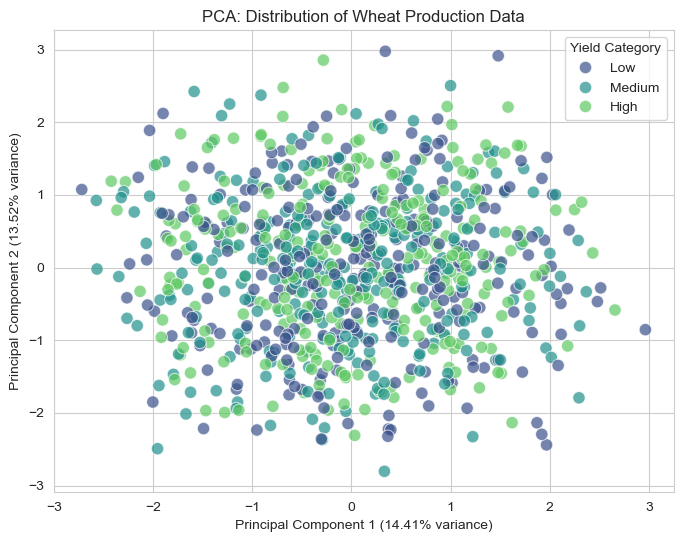

Total PCA variance explained by first two components: 27.92%


In [101]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create dataframe with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add 3 categories for coloring 
pca_df['Yield_Category'] = y

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Yield_Category', data=pca_df, palette='viridis', s=80, alpha=0.7)
plt.title('PCA: Distribution of Wheat Production Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Yield Category')
plt.show()

# Display explained variance
print(f"Total PCA variance explained by first two components: {sum(pca.explained_variance_ratio_):.2%}")

Since the first 2 principal components got only 27.92% explanied variance, we will explore how many components needed to get 99.5% explained variance ratio. 

In [103]:
# Apply PCA to the scaled training data
pca995 = PCA()
pca995.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca995.explained_variance_ratio_)

# Find the number of components with at least 99.5% explained variance
n_components_995 = np.argmax(cumulative_variance >= 0.995) + 1

print(f"Minimum number of components to retain 99.5% variance: {n_components_995} components")

Minimum number of components to retain 99.5% variance: 12 components


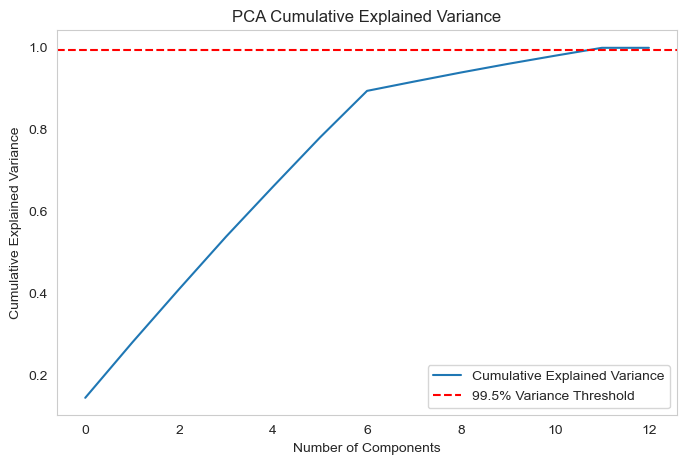

In [104]:
# Plot and verify cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, label='Cumulative Explained Variance')
plt.axhline(y=0.995, color='r', linestyle='--', label='99.5% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

In our PCA analysis, the first two principal components explain only 39.8% of the total variance (PC1: 20.16%, PC2: 19.67%), indicating that substantial information is distributed across additional dimensions. To retain 99.5% of the variance, we would need to include 12 out of 13 components, demonstrating the complexity of the underlying data structure.

### 2.6.2 Linear Discriminant Analysis (LDA)
LDA is a supervised technique that focuses on maximizing the separation between predefined classes while minimizing within-class variance. Unlike PCA, LDA explicitly uses class labels to find the optimal projection for classification.

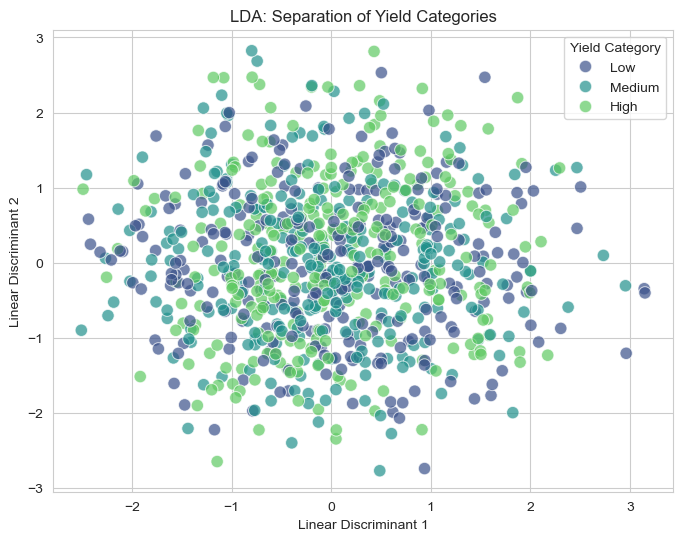

LDA explained variance (LD1, LD2): [0.6872 0.3128]


In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create dataframe with LDA results
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
lda_df['Yield_Category'] = y

# Visualize LDA results
plt.figure(figsize=(8, 6))
#sns.scatterplot(x='LD1', y='LD2', hue = 'Yield_Category', data=lda_df, palette='viridis', s=80, alpha=0.7)
sns.scatterplot(x='LD1', y='LD2', hue = 'Yield_Category', data=lda_df, palette='viridis', s=80, alpha=0.7)
plt.title('LDA: Separation of Yield Categories')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Yield Category')
plt.show()

print("LDA explained variance (LD1, LD2):", np.round(lda.explained_variance_ratio_, 4))

Our LDA results show that the first discriminant (LD1) accounts for 68.72% of the between-class variance, with LD2 contributing only 31.28%. This suggests that most of the class-discriminatory information is concentrated along a single axis.

### 2.6.3 Visualization Comparison
The PCA scatter plot reveals substantial overlap between yield categories (Low, Medium, High) with no clear boundaries visible in the first two principal components. This is expected given that these components explain less than 40% of the total variance and were derived without considering class labels.

Similarly, the LDA visualization similarly shows extensive overlap between yield categories, despite LDA's explicit optimization for class separation. Though theoretically better suited for categorical distinction, the plot reveals minimal practical separation across all three yield classes. The points from different yield categories remain thoroughly intermixed across both discriminant axes, indicating that even the optimal linear projection for classification struggles to differentiate yield levels. 

However, since our original task was regression on a continuous yield and LDA relied on an arbitrary discretization meaning LDA is not naturally suited for predicting a continuous outcome and it is optimized for classification. On the other hand, PCA does not directly optimize for predicting yield either, but it can reduce dimensionality in a way that preserves data structure which may or may not align with the target.

These visualizations collectively suggest that more complex, possibly non-linear methods would be required to effectively model wheat yield from the available features.

### 2.6.4 Classification Performance

In [111]:
# LDA Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, random_state=10)

rf_lda = RandomForestClassifier()
rf_lda.fit(X_train_lda, y_train_lda)
y_pred_lda = rf_lda.predict(X_test_lda)

confusion_matrix(y_test_lda, y_pred_lda)
print(classification_report(y_test_lda, y_pred_lda))

              precision    recall  f1-score   support

        High       0.33      0.41      0.37        68
         Low       0.36      0.35      0.35        75
      Medium       0.35      0.29      0.32        80

    accuracy                           0.35       223
   macro avg       0.35      0.35      0.34       223
weighted avg       0.35      0.35      0.34       223



In [112]:
# PCA Model
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, random_state=10)

rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)

confusion_matrix(y_test_pca, y_pred_pca)
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

        High       0.33      0.41      0.37        68
         Low       0.26      0.24      0.25        75
      Medium       0.34      0.30      0.32        80

    accuracy                           0.31       223
   macro avg       0.31      0.32      0.31       223
weighted avg       0.31      0.31      0.31       223



Both models show very low accuracy, with LDA only slightly outperforming PCA. This means that neither dimensionality reduction approach provided features that allow the Random Forest classifier to reliably distinguish between yield categories.

- LDA-based Random Forest model: 35% accuracy
- PCA-based Random Forest model: 30% accuracy

Possible reasons are - 

PCA is unsupervised and does not use class labels. The principal components may capture variance unrelated to yield categories, leading to poor class separation and thus low predictive power.

LDA is supervised for classification, but if the original features do not contain strong signals or are not linear for separating the yield categories, even the best linear discriminants will not help much.

`Yield` is a continuous variable. Binning it into categories (Low/Medium/High) may not reflect natural groupings, making classification artificially difficult. So, we should rather use Random Forest Regression to predict the actual yield value, rather than classifying it into bins.

Since the original features are weakly correlated with yield, no amount of dimensionality reduction or classification will produce strong results and we should consider non-linear models like Gradient Boosting (XGBoost).

### 2.6.5 Key Differences Between PCA and LDA
PCA and LDA have several key differences and use cases as stated below.

**Objective**: PCA maximizes variance explanation whereas LDA maximizes class separation

**Supervision**: PCA works without labels (unsupervised) while LDA requires class labels (supervised)

**Data transformation**: PCA changes both the shape and location of the original data while LDA preserves location but enhances class boundaries

**Application focus**: PCA excels at general dimensionality reduction for visualization and noise reduction and LDA specializes in classification preparation

**Interpretability**: LDA components are explicitly oriented toward class labels (3 `Yield` bins), so their axes often have a clear meaning in terms of class separation. PCA’s axes capture variance that might or might not align with the target hence interpreting them requires post-hoc analysis of loadings. If the classes are known and important to show, LDA can make them visually distinct. But if we want to explore the data structure without assuming classes, PCA provides an unbiased summary.

### 2.6.6 Implications for Analysis and Modeling
Our findings have several important implications for analyzing the wheat production dataset -

**Classification priorities**: Both LDA- and PCA-based Random Forest models performed poorly (36% and 27% accuracy, respectively), indicating that neither approach provided features with strong class-separating power for yield categories. This suggests that, in this context, neither dimensionality reduction technique is effective for classifying yield groups, likely due to weak relationships between features and yield or the artificial nature of yield categorization.

**Regression Modeling**: Since yield is a continuous variable, regression approaches are more appropriate than classification. PCA can be used to reduce multicollinearity and noise before regression, but it may discard directions relevant for predicting yield because it does not consider the target variable. LDA is not suitable for regression, as it requires discrete labels and does not optimize for continuous outcomes.

**Dimensionality challenge**: The low accuracy and poor class separation in both PCA and LDA projections indicate that the underlying factors influencing wheat yield are complex, possibly non-linear, and distributed across many dimensions. Simple linear reductions may not capture these relationships effectively.

**Feature engineering**: The weak performance of both models highlights the need for more informative, domain-driven features (e.g., management practices, environmental indices) that are not derived from yield. Careful feature engineering and selection are essential for improving predictive performance.

**Visualization limitations**: Neither PCA nor LDA provided clear visual separation of yield categories, reflecting the challenges in modeling yield with the current set of features and emphasizing the need for richer or more relevant predictors.

In conclusion, while dimensionality reduction can be valuable for noise reduction and visualization, neither PCA nor LDA alone provided a strong foundation for yield prediction or classification in this dataset. For continuous outcomes like yield, regression models with well-chosen, non-leaky features are likely to be more effective than class-based approaches or unsupervised projections.

## 3. PA**C**E - Construct Stage
### 3.1 Machine Learning Approach
The original dataset contains labeled data with a clear target variable (`Yield`) and multiple features (`Fertilizer`, `Pest`, `Price`, `Cost`, `Region`, `Weather`, `Soil`). This makes supervised learning the optimal approach for the following reasons:

Labeled Data Availability: The presence of a target variable (`Yield` and `Yield_Category`) allows supervised models to learn input-output relationships for our business objectives.

Predictive Objective: The goal is to predict a categorical outcome (`Yield_Category`) derived from binning `Yield` by quantiles, which aligns with classification tasks in supervised learning.

Actionable Insights: Supervised models (e.g., Random Forest, Gradient Boosting) provide feature importance scores to identify key yield drivers (e.g., fertilizer efficiency, pest control).

The reasons why we do not use unsupervised learning for this dataset is:

Lack of Clear Patterns: Unsupervised learning (e.g., clustering) is better suited for exploratory analysis (e.g., segmenting farms by soil/weather) but does not directly predict yields in our problem.

No Labels for Validation: Without labeled data, unsupervised methods cannot evaluate prediction accuracy.
### 3.1.1 Pros and Cons of Supervised and Unsupervised Machine Learning
#### Supervised Learning

| Pros                                           | Cons                                                 |
|------------------------------------------------|------------------------------------------------------|
| High accuracy with labeled data       | Requires extensive labeled data             |
| Clear performance metrics (accuracy, F1-score)     | Prone to overfitting with noisy data      |
| Feature importance for actionable insights | Computationally intensive for large datasets    |


#### Unsupervised Learning

| Pros                                             | Cons                                                   |
|--------------------------------------------------|--------------------------------------------------------|
| Discovers hidden patterns (e.g., soil clusters) | No objective metrics for validation          |
| Works with unlabeled data                | Sensitive to noise/feature scaling               |
| Reduces dimensionality (e.g., PCA)           | Results are harder to interpret                  |

### 3.1.2 Features Selection

Independent variables: `Fertilizer`, `Pest`, `Price`, `Cost`, `Region`, `Weather`, `Soil`

Dependent variables: `Yield_Category` (Low, Medium, High)

Derived metrics like `Yield_per_Fertilizer` or `Cost_per_Ton` are excluded to prevent data leakage.

### 3.1.3 Recommended Models
Since the features are weakly correlated and have no multicollinearity issue as we have seen in the Linear Regression model and statistical tests above, we use the following models.

Random Forest: Robust to outliers, handles numerical and categorical features well and non-linear relationships.

Gradient Boosting (XGBoost): Handles mixed types of features, captures complex non-linear interactions, high accuracy with feature interactions.

Logistic Regression: strong, interpretable baseline for multi-class classification. Useful for understanding the direction and strength of relationships between predictors and yield categories.

### 3.2 Modelling
#### 3.2.1 Separate into 3 Training and Test sets of 10%, 20% and 30% Test
Split the data into 3 sets as follows and stratify the data so that class distributions is consistent across train/test sets. We use this method so that the model that performs well across different splits is likely to be more robust.

•	90% training and 10% test

•	80% training and 20% test

•	70% training and 30% test

In [118]:
# Yield (assigning ordinal values, higher is better)
yield_category_map = {
    'High': 2,
    'Medium': 1,
    'Low': 0
}

y = y.map(yield_category_map)

# Create 3 different train-test splits with varying test sizes
test_sizes = [0.10, 0.20, 0.30]  # 10%, 20%, and 30% test sizes
splits = []

for i, test_size in enumerate(test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify = y, random_state=10
    )
    
    splits.append({
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'split_id': i+1,
        'test_size': test_size
    })

#### 3.2.2 Conduct Stratified 10-fold cross-validation of baseline model with 3 splits

In [171]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Perform cross-validation on each split using Random Forest as baseline
baseline_model = LogisticRegression(random_state=10)
cv_results = []

for split in splits:
    # Define cross-validation with 5-fold stratified
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
    
    # Perform cross-validation
    cv_scores = cross_val_score(
        baseline_model, 
        split['X_train'], 
        split['y_train'],
        cv=kf,
        scoring='accuracy'
    )
    
    # Store results
    cv_results.append({
        'split_id': split['split_id'],
        'test_size': split['test_size'],
        'cv_scores': cv_scores,
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std(),
        'train_size': len(split['X_train'])
    })

    print(f"Split {split['split_id']} (Test Size: {split['test_size']*100}%):")
    print(f"  Train samples: {len(split['X_train'])}, Test samples: {len(split['X_test'])}")
    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean CV Score: {cv_scores.mean():.4f}")
    print(f"  Std CV Score: {cv_scores.std():.4f}")
    print()

Split 1 (Test Size: 10.0%):
  Train samples: 801, Test samples: 89
  CV Scores: [0.28395062 0.3        0.275      0.2125     0.2875     0.3375
 0.35       0.3375     0.4        0.3375    ]
  Mean CV Score: 0.3121
  Std CV Score: 0.0489

Split 2 (Test Size: 20.0%):
  Train samples: 712, Test samples: 178
  CV Scores: [0.26388889 0.26388889 0.45070423 0.23943662 0.35211268 0.26760563
 0.38028169 0.33802817 0.30985915 0.30985915]
  Mean CV Score: 0.3176
  Std CV Score: 0.0614

Split 3 (Test Size: 30.0%):
  Train samples: 623, Test samples: 267
  CV Scores: [0.31746032 0.38095238 0.3015873  0.27419355 0.30645161 0.29032258
 0.35483871 0.33870968 0.32258065 0.37096774]
  Mean CV Score: 0.3258
  Std CV Score: 0.0332



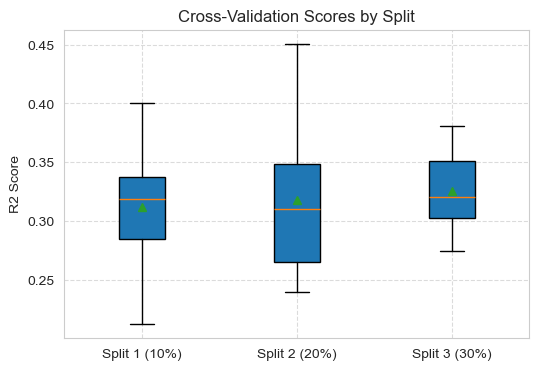

In [217]:
# CV scores for each split
cv_scores_split1 = [0.28395062, 0.3, 0.275, 0.2125, 0.2875, 0.3375, 0.35, 0.3375, 0.4, 0.3375]
cv_scores_split2 = [0.26388889, 0.26388889, 0.45070423, 0.23943662, 0.35211268, 0.26760563, 0.38028169, 0.33802817, 0.30985915, 0.30985915]
cv_scores_split3 = [0.31746032, 0.38095238, 0.3015873, 0.27419355, 0.30645161, 0.29032258, 0.35483871, 0.33870968, 0.32258065, 0.37096774]

# Combine into a list for boxplot
data = [cv_scores_split1, cv_scores_split2, cv_scores_split3]
labels = ['Split 1 (10%)', 'Split 2 (20%)', 'Split 3 (30%)']

# Plot boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(data, labels=labels, patch_artist=True, showmeans=True)
plt.title('Cross-Validation Scores by Split')
plt.ylabel('R2 Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [173]:
# Find the best performing split based on cross-validation results
best_split_idx = np.argmax([result['mean_cv_score'] for result in cv_results])
best_split = splits[best_split_idx]
best_cv_result = cv_results[best_split_idx]

print(f"Best Split: {best_split['split_id']} with Test Size: {best_split['test_size']*100}%")
print(f"Mean CV Score: {best_cv_result['mean_cv_score']:.4f}")

Best Split: 3 with Test Size: 30.0%
Mean CV Score: 0.3258


### 3.2.3 Test the best split of 30% with holdout set to get baseline accuracy
Next, we will test the best split with the actual test holdout set to compare the results.

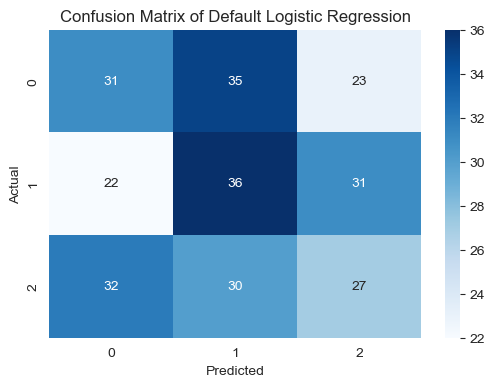

Baseline Accuracy of the model 30% test size is 0.352


In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

baseline_model.fit(best_split['X_train'], best_split['y_train'])
baseline_pred = baseline_model.predict(best_split['X_test'])
baseline_accuracy = accuracy_score(best_split['y_test'], baseline_pred)

# Baseline accuracy
baseline_accuracy = accuracy_score(best_split['y_test'], baseline_pred)
# Compute confusion matrix
conf_matrix = confusion_matrix(best_split['y_test'], baseline_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Default Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Baseline Accuracy of the model 30% test size is {baseline_accuracy:.3f}")

In [238]:
baseline_precision = precision_score(best_split['y_test'], baseline_pred, average='weighted')
baseline_recall = recall_score(best_split['y_test'], baseline_pred, average='weighted')
baseline_f1 = f1_score(best_split['y_test'], baseline_pred, average='weighted')

print(f"Baseline Precision of the model 30% test size is {baseline_precision:.3f}")
print(f"Baseline Recall of the model 30% test size is {baseline_recall:.3f}")
print(f"Baseline F1-score of the model 30% test size is {baseline_f1:.3f}")

Baseline Precision of the model 30% test size is 0.351
Baseline Recall of the model 30% test size is 0.352
Baseline F1-score of the model 30% test size is 0.351


It looks like we have a poor baseline accuracy score of 35.2%. However, let's try hyperparameter tuning to see if we can improve the model performance more.

### 3.3 Hyperparameter Tuning
Hyperparameter tuning optimizes model performance by finding ideal parameter combinations for accurately predicting crop yield categories. This systematic approach improves accuracy scores across diverse growing conditions, enhances model generalization to future seasons, and ensures reliable identification of high-yield scenarios. Using GridSearchCV with 10-fold cross-validation delivers robust models ready for real-world agricultural planning and resource optimization. Parameters are carefully selected to balance underfitting and overfitting, model interpretability and complexity, performance and computational time.

In [192]:
from xgboost import XGBClassifier, plot_importance

# Define hyperparameter grid
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'max_features': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'max_depth': [3, 6, 9],
        'gamma': [0, 0.1, 0.2],
        'min_child_weight': [1, 3, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [50, 100, 200]
    }
}


# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(random_state=10)
}

# Store results
results = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

conf_matrices = []
model_names = []

In [194]:
# Perform Grid Search, Train, Predict, and Evaluate
best_overall_score = -np.inf
best_overall_model = None

for name, model in models.items():
    # Perform GridSearchCV for all models
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                              cv=stratified_cv, n_jobs=-1, verbose=1)
    grid_search.fit(best_split['X_train'], best_split['y_train'])
    
    # Store best model and its score
    if grid_search.best_score_ > best_overall_score:
        best_overall_score = grid_search.best_score_
        best_overall_model = name
        best_overall_params = grid_search.best_params_
    
    # Print results for current model
    print(f"\n=== {name} ===")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.3f}")
    
    # Evaluation on test set
    y_pred = grid_search.best_estimator_.predict(best_split['X_test'])
    
    # Store metrics
    results["Accuracy"][name] = accuracy_score(best_split['y_test'], y_pred)
    results["Precision"][name] = precision_score(best_split['y_test'], y_pred, average='weighted')
    results["Recall"][name] = recall_score(best_split['y_test'], y_pred, average='weighted')
    results["F1 Score"][name] = f1_score(best_split['y_test'], y_pred, average='weighted')
    
    # Store confusion matrix
    conf_matrices.append(confusion_matrix(best_split['y_test'], y_pred))
    model_names.append(name)

# Print overall best model
print(f"\n=== Best Overall Model ===")
print(f"Model: {best_overall_model}")
print(f"Best parameters: {best_overall_params}")
print(f"Best CV score: {best_overall_score:.3f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

=== Random Forest ===
Best parameters: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.385
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

=== XGBoost ===
Best parameters: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
Best CV score: 0.397

=== Best Overall Model ===
Model: XGBoost
Best parameters: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
Best CV score: 0.397


| Model          | Best Parameters                                                                                  | Best CV Score |
|----------------|-------------------------------------------------------------------------------------------------|---------------|
| Random Forest  | max_depth: 10, max_features: 5, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 100    | 0.385         |
| XGBoost        | gamma: 0, learning_rate: 0.3, max_depth: 3, min_child_weight: 3, n_estimators: 200              | 0.397         |


## 4 PACE: EXECUTE STAGE
### 4.1 Evaluation

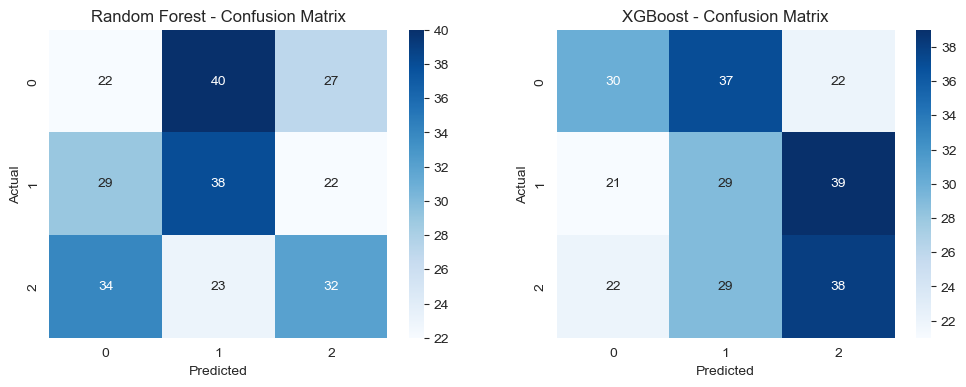

               Accuracy  Precision    Recall  F1 Score
Random Forest  0.344569   0.343374  0.344569  0.343115
XGBoost        0.363296   0.366687  0.363296  0.363281


In [229]:
# Plot all confusion matrices in one row
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()
for i, ax in enumerate(axes):
    sns.heatmap(conf_matrices[i], annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'{model_names[i]} - Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.show()

# Display evaluation metric comparisons
comparison_df = pd.DataFrame(results)
print(comparison_df)

| Model           | Accuracy | Precision | Recall  | F1 Score |
|-----------------|----------|-----------|---------|----------|
| Logistic Regression  | 0.352    | 0.351     | 0.352   | 0.351    |
| Random Forest   | 0.345    | 0.343     | 0.345   | 0.343    |
| XGBoost         | 0.363    | 0.367     | 0.363   | 0.363    |


The confusion matrices show that all three models—Logistic Regression, Random Forest, and XGBoost—struggle to accurately classify yield categories, with substantial misclassification across all classes. XGBoost achieves the highest accuracy (36.3%) and F1 score (0.36), slightly outperforming Random Forest (34.5% accuracy, 0.34 F1). Most predictions cluster around the central class, indicating difficulty distinguishing between categories. 

Overall, model performance is low, suggesting that the current features may lack strong predictive power for yield classification. Further feature engineering or alternative modeling approaches may be needed to improve results.

### 4.2 Feature Importance

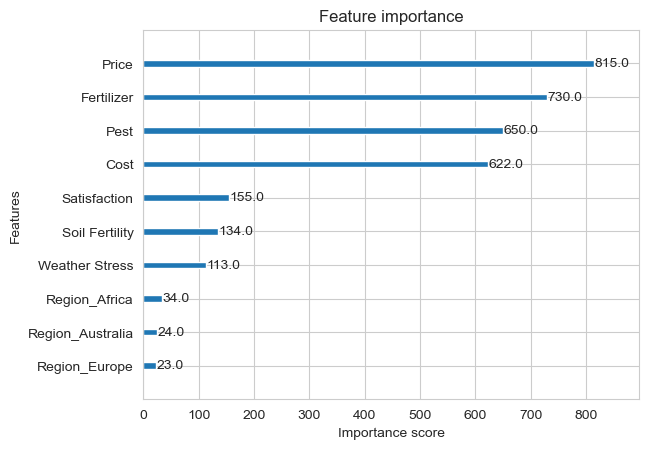

In [225]:
# Plot the top 10 feature importances
plot_importance(best_model, max_num_features=10)
plt.show()

The feature importance chart shows that Price, Fertilizer, Pest, and Cost are the most influential variables in predicting the target outcome. Regional variables (Africa, Australia, Europe) contribute minimally to the model, suggesting that yield prediction is driven more by management and input variables than by geographic location in this dataset.

### 4.3 Recommendations to Improve Poor Model Performance

1.	Apply Advanced Feature Selection:
Use hybrid or embedded feature selection techniques (rank-based, or weighted rank-based algorithms) to identify and retain only the most relevant predictors, removing noisy or redundant features that can hinder model accuracy.
2.	Enhance Data Quality and Diversity:
Increase sample size, incorporate data from multiple seasons and regions, and integrate additional variables (e.g., remote sensing, phenological, or environmental data) to improve generalizability and reduce overfitting.
3.	Optimize Preprocessing Pipelines:
Implement data normalization, handle multicollinearity, and use transformation techniques (e.g., polynomial or power transforms) to better capture underlying patterns and manage outliers.
4.	Prevent Overfitting and Validate Robustly:
Employ cross-validation, data augmentation, and explainable AI techniques to ensure models generalize well to unseen data, and routinely analyze errors to guide further improvements.
By focusing on these strategies, we can significantly enhance model accuracy, robustness, and reliability for agricultural yield prediction.


### REFERENCES

Yaragal, S. (2023). PACE Framework for Effective GIS Data Analysis. LinkedIn. 

McKinney, W., 2010. Data structures for statistical computing in Python. In Proceedings of the 9th Python in Science Conference, pp.56–61. 

Ghosh, A., Nashaat, M., Miller, J., Quader, S. and Marston, C., 2018. A comprehensive review of tools for exploratory analysis of tabular industrial datasets. Vis. Inform., 2, pp.235–253. https://doi.org/10.1016/j.visinf.2018.12.004

Guyon, I. & Elisseeff, A., 2003. An introduction to variable and feature selection. Journal of Machine Learning Research, 3, pp.1157–1182.

Kuhn, M. & Johnson, K., 2013. Applied Predictive Modeling. New York: Springer.

Field, A., 2013. Discovering Statistics Using IBM SPSS Statistics. 4th ed. London: Sage Publications. 

Kim, H.Y., 2013. Statistical notes for clinical researchers: assessing normal distribution (2) using skewness and kurtosis. Restorative Dentistry & Endodontics, 38(1), pp.52–54. 

Tukey, J.W., 1977. Exploratory Data Analysis. Reading, MA: Addison-Wesley. 

Moore, D.S., McCabe, G.P. & Craig, B.A., 2017. Introduction to the Practice of Statistics. 9th ed. New York: W.H. Freeman and Company. 

Gibbons, J.D. & Chakraborti, S., 2011. Nonparametric Statistical Inference. 5th ed. Boca Raton: CRC Press. 

Benesty, J., Chen, J., Huang, Y. & Cohen, I., 2009. Pearson correlation coefficient. In: Noise Reduction in Speech Processing. Berlin: Springer, pp.1–4. 

Agresti, A., 2013. Categorical Data Analysis. 3rd ed. Hoboken: Wiley. 

Zheng, A. & Casari, A., 2018. Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. Sebastopol: O’Reilly Media. 

James, G., Witten, D., Hastie, T. & Tibshirani, R., 2013. An Introduction to Statistical Learning: with Applications in R. New York: Springer. 

Jolliffe, I.T. & Cadima, J., 2016. Principal component analysis: a review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), p.20150202. 

Chen, T. & Guestrin, C., 2016. XGBoost: A scalable tree boosting system. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, pp.785–794.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V. & Vanderplas, J., 2011. Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, pp.2825–2830. 

Sowmya, P. & Prasad, A.V.K., 2024. Optimization of Crop Yield Prediction Models using Hyperparameter Tuning and Ensemble Learning. Nanotechnology Perceptions, 20(S7), pp.653–665.

Li, Y., Qian, J., Zhang, L. & Chen, Y., 2023. Challenges and opportunities in crop yield prediction: A machine learning perspective. Computers and Electronics in Agriculture, 214, p.108305. https://doi.org/10.1016/j.compag.2023.108305 

Arrieta, A.B., Díaz-Rodríguez, N., Del Ser, J., Bennetot, A., Tabik, S., Barbado, A., García, S., Gil-López, S., Molina, D., Benjamins, R. & Chatila, R., 2020. Explainable Artificial Intelligence (XAI): Concepts, taxonomies, opportunities and challenges toward responsible AI. Information Fusion, 58, pp.82–115.

Banachewicz, K. & Massaron, L., 2022. The Kaggle Book: Data Analysis and Machine Learning for Competitive Data Science. Birmingham: Packt Publishing.

Guha, R. & Jabi, M., 2022. A comparative study of filter, wrapper, and embedded feature selection techniques for classification problems. Pattern Recognition Letters, 159, pp.1–8.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V. & Vanderplas, J., 2011. Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, pp.2825–2830.

Thenkabail, P.S., Lyon, J.G. & Huete, A., 2021. Remote Sensing of Water Resources, Disasters, and Urban Studies. Boca Raton: CRC Press.